# Customer Segmentation :

Data Science and Machine Learning is not closed into any single domain or industry . Customer segmentation had revolutionized the business strategies for soo many organizations . Now companies can make different strategies with different clusters of customers  . They do not have to follow one sale or one strategy for all , now they can have different approaches .

This dataset has information about a customers different type of purchases history , Income , marital status , they have children or not . It also has some additional columns where it has information about whether the customer had accepted any promos or they have launch any complain or not.

In this Project i have done customer segmentation with clustering algorithms . All this 5 clusters of customers has different Income , different spending ,behaviour , different purchase count . I had also done in depth EDA or Data Analysis to find any underlying aspects in the dataset . Plaese take a look and in the end i have separately mentioned all the clusters of customers and their different characteristics .

In [ ]:
import numpy as np ## Importing numpy library for data analysis .
import pandas as pd ## Importing Pandas library for data analysis .
import matplotlib.pyplot as plt ## Importing matplotlib library for data visualization .
import seaborn as sns   ## Importing seaborn library for data visualization .
import plotly.express as px  ## Importing plotly express for advance data visualization .

In [ ]:
cust_raw=pd.read_csv("/content/customer_segmentation.csv")
customer=cust_raw.copy() ## Create a copy of our dataset for further analysis .
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
print("Size of this dataset is :", customer.shape)  ## shape function will show total no of rows and columns .

Size of this dataset is : (2240, 29)


In [ ]:
customer.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
customer.columns ## columns function will show the name of all columns .

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

Renaming some columns to make it more accurate and easy to understand .

In [ ]:
customer=customer.rename(columns={'MntWines':'Wines','MntFruits':'Fruits','MntMeatProducts':'Meat_products','MntFishProducts':'Fish_products',
                                  'MntSweetProducts':'Sweet_products','MntGoldProds':'Gold_products','NumDealsPurchases':'Deals_purchases',
                                  'NumWebPurchases':'Web_purchases','NumCatalogPurchases':'Catalog_purchases','NumStorePurchases':'Store_purchases',
                                  'NumWebVisitsMonth':'Total_WebVisits','AcceptedCmp3':'Cmp3','AcceptedCmp4':'Cmp4','AcceptedCmp5':'Cmp5',
                                  'AcceptedCmp1':'Cmp1','AcceptedCmp2':'Cmp2','Z_CostContact':'Cost_contact','Z_Revenue':'Cost_Revenue'})

In [ ]:
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Total_WebVisits,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Cost_contact,Cost_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
customer.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2240 non-null   int64  
 1   Year_Birth         2240 non-null   int64  
 2   Education          2240 non-null   object 
 3   Marital_Status     2240 non-null   object 
 4   Income             2216 non-null   float64
 5   Kidhome            2240 non-null   int64  
 6   Teenhome           2240 non-null   int64  
 7   Dt_Customer        2240 non-null   object 
 8   Recency            2240 non-null   int64  
 9   Wines              2240 non-null   int64  
 10  Fruits             2240 non-null   int64  
 11  Meat_products      2240 non-null   int64  
 12  Fish_products      2240 non-null   int64  
 13  Sweet_products     2240 non-null   int64  
 14  Gold_products      2240 non-null   int64  
 15  Deals_purchases    2240 non-null   int64  
 16  Web_purchases      2240 

In [ ]:
customer['Dt_Customer']=pd.to_datetime(customer['Dt_Customer'],format="%d-%m-%Y") ## Changing the type of column to date type column .

In [ ]:
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Total_WebVisits,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Cost_contact,Cost_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
customer['Dt_Customer'].max() ## Using max function to get the max date .

Timestamp('2014-06-29 00:00:00')

In [ ]:
customer['Age']=2014-customer['Year_Birth'] ## Creating 'Age' column by subtract the birth year from 2014 .
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Cost_contact,Cost_Revenue,Response,Age
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,0,0,3,11,1,57
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,0,3,11,0,60
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,0,3,11,0,49
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,0,3,11,0,30
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,0,3,11,0,33


In [ ]:
customer=customer.drop_duplicates() ## Drop_duplicates will drop all the duplicate rows .

In [ ]:
customer.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   ID                 2240 non-null   int64         
 1   Year_Birth         2240 non-null   int64         
 2   Education          2240 non-null   object        
 3   Marital_Status     2240 non-null   object        
 4   Income             2216 non-null   float64       
 5   Kidhome            2240 non-null   int64         
 6   Teenhome           2240 non-null   int64         
 7   Dt_Customer        2240 non-null   datetime64[ns]
 8   Recency            2240 non-null   int64         
 9   Wines              2240 non-null   int64         
 10  Fruits             2240 non-null   int64         
 11  Meat_products      2240 non-null   int64         
 12  Fish_products      2240 non-null   int64         
 13  Sweet_products     2240 non-null   int64         
 14  Gold_pro

In [ ]:
## Created a new column Total spent by adding all the different type of spending .
customer['Total_spent']=customer['Wines']+customer['Fruits']+customer['Meat_products']+customer['Fish_products']+customer['Sweet_products']+customer['Gold_products']

In [ ]:
## Created a new column Total purchases by adding all the different type of purchases .
customer['Total_purchases']=customer['Deals_purchases']+customer['Web_purchases']+customer['Catalog_purchases']+customer['Store_purchases']

In [ ]:
## Created a new column Total_accepted_promos by adding all the different type of accepted_promos .
customer['Total_accepted_promos']=customer['Cmp1']+customer['Cmp2']+customer['Cmp3']+customer['Cmp4']+customer['Cmp5']

In [ ]:
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Cmp1,Cmp2,Complain,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,3,11,1,57,1617,25,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,3,11,0,60,27,6,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,3,11,0,49,776,21,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,3,11,0,30,53,8,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,3,11,0,33,422,19,0


In [ ]:
customer.columns ## columns function will show the name of all columns .

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits',
       'Meat_products', 'Fish_products', 'Sweet_products', 'Gold_products',
       'Deals_purchases', 'Web_purchases', 'Catalog_purchases',
       'Store_purchases', 'Total_WebVisits', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp1',
       'Cmp2', 'Complain', 'Cost_contact', 'Cost_Revenue', 'Response', 'Age',
       'Total_spent', 'Total_purchases', 'Total_accepted_promos'],
      dtype='object')

In [ ]:
## Creating a new dataframe for only numeric columns .
int_columns=customer[['Income','Recency','Wines', 'Fruits',
       'Meat_products', 'Fish_products', 'Sweet_products', 'Gold_products',
       'Deals_purchases', 'Web_purchases', 'Catalog_purchases',
       'Store_purchases', 'Total_WebVisits','Cost_contact', 'Cost_Revenue','Age',
       'Total_spent', 'Total_purchases', 'Total_accepted_promos']]

In [ ]:
int_columns.head() ## head function will show us the top 5 rows .

,Income,Recency,Wines,Fruits,Meat_products,Fish_products,Sweet_products,Gold_products,Deals_purchases,Web_purchases,Catalog_purchases,Store_purchases,Total_WebVisits,Cost_contact,Cost_Revenue,Age,Total_spent,Total_purchases,Total_accepted_promos
0,58138.0,58,635,88,546,172,88,88,3,8,10,4,7,3,11,57,1617,25,0
1,46344.0,38,11,1,6,2,1,6,2,1,1,2,5,3,11,60,27,6,0
2,71613.0,26,426,49,127,111,21,42,1,8,2,10,4,3,11,49,776,21,0
3,26646.0,26,11,4,20,10,3,5,2,2,0,4,6,3,11,30,53,8,0
4,58293.0,94,173,43,118,46,27,15,5,5,3,6,5,3,11,33,422,19,0


Creating a for loop with histogram for all the numeric columns to see their distribution and also we can see each columns mean , median , range and skewness .

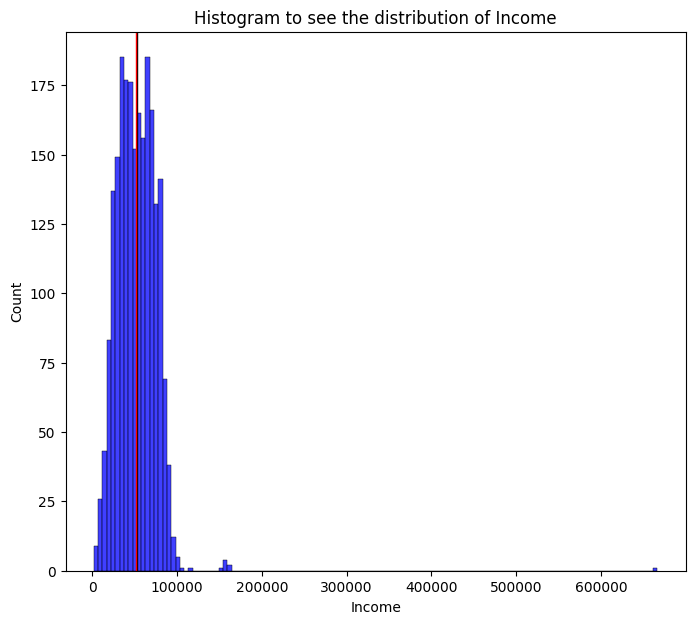

-----------------------------------------------
Mean value of Income : 52247.25135379061
Median value of Income : 51381.5
Range of Income : 664936.0
Skewness of Income : 6.763487372811116


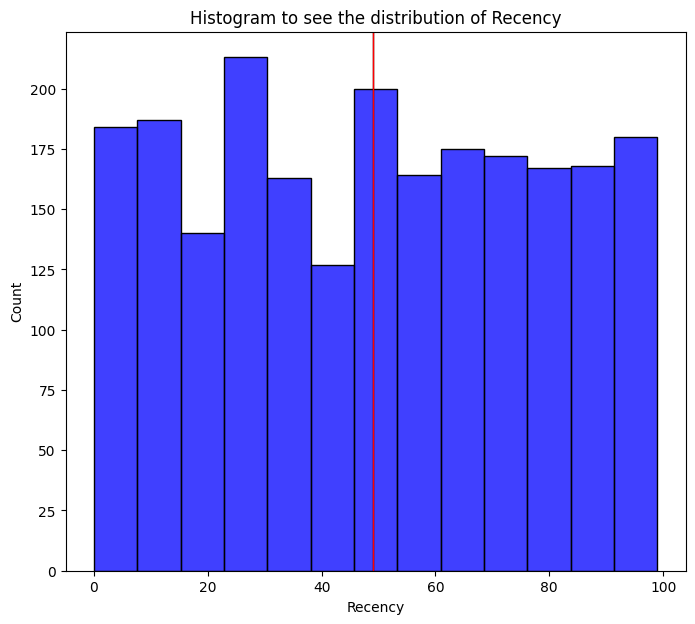

-----------------------------------------------
Mean value of Recency : 49.109375
Median value of Recency : 49.0
Range of Recency : 99
Skewness of Recency : -0.0019866586335935076


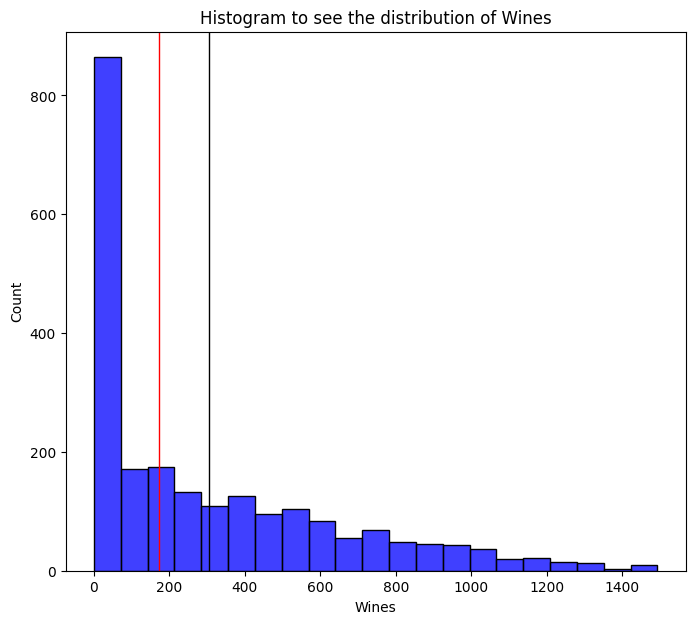

-----------------------------------------------
Mean value of Wines : 303.9357142857143
Median value of Wines : 173.5
Range of Wines : 1493
Skewness of Wines : 1.1757705637550502


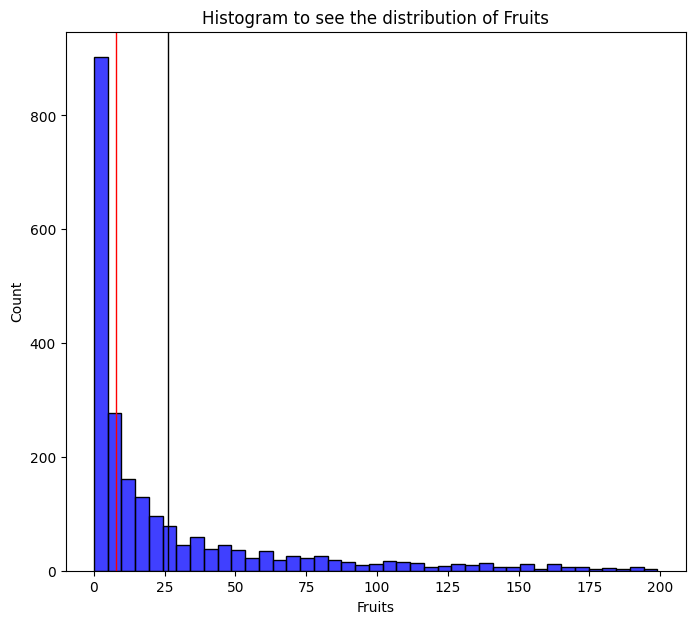

-----------------------------------------------
Mean value of Fruits : 26.302232142857143
Median value of Fruits : 8.0
Range of Fruits : 199
Skewness of Fruits : 2.1020633046228268


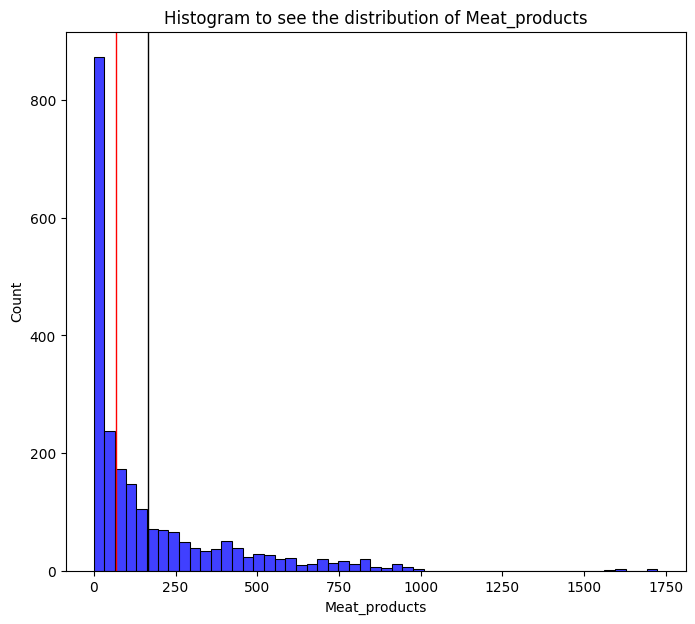

-----------------------------------------------
Mean value of Meat_products : 166.95
Median value of Meat_products : 67.0
Range of Meat_products : 1725
Skewness of Meat_products : 2.083233112943474


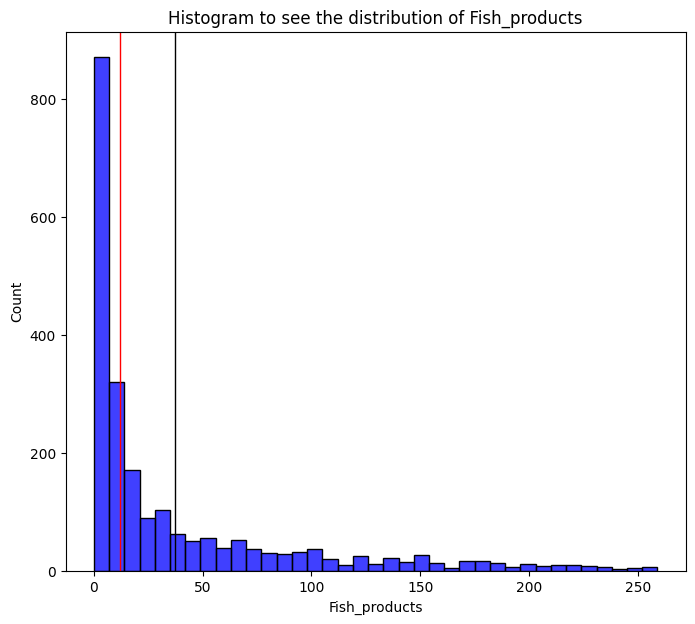

-----------------------------------------------
Mean value of Fish_products : 37.52544642857143
Median value of Fish_products : 12.0
Range of Fish_products : 259
Skewness of Fish_products : 1.9197689706698498


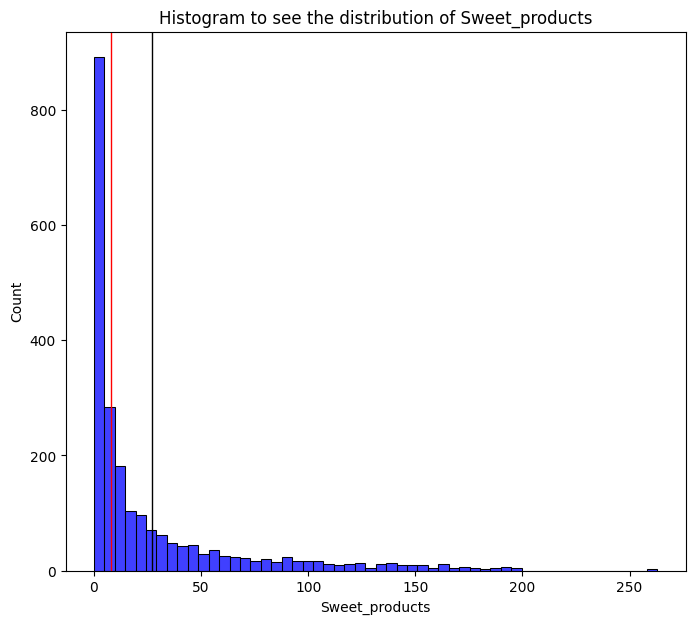

-----------------------------------------------
Mean value of Sweet_products : 27.06294642857143
Median value of Sweet_products : 8.0
Range of Sweet_products : 263
Skewness of Sweet_products : 2.136080712154738


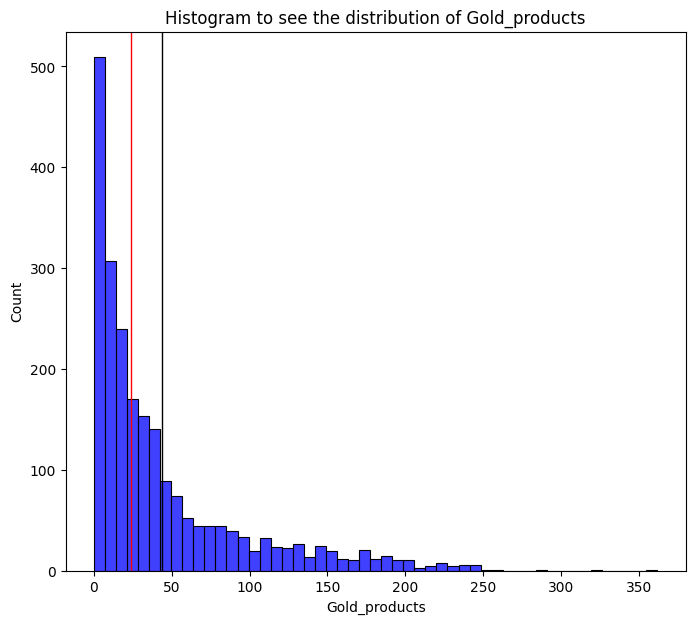

-----------------------------------------------
Mean value of Gold_products : 44.021875
Median value of Gold_products : 24.0
Range of Gold_products : 362
Skewness of Gold_products : 1.8861056091894417


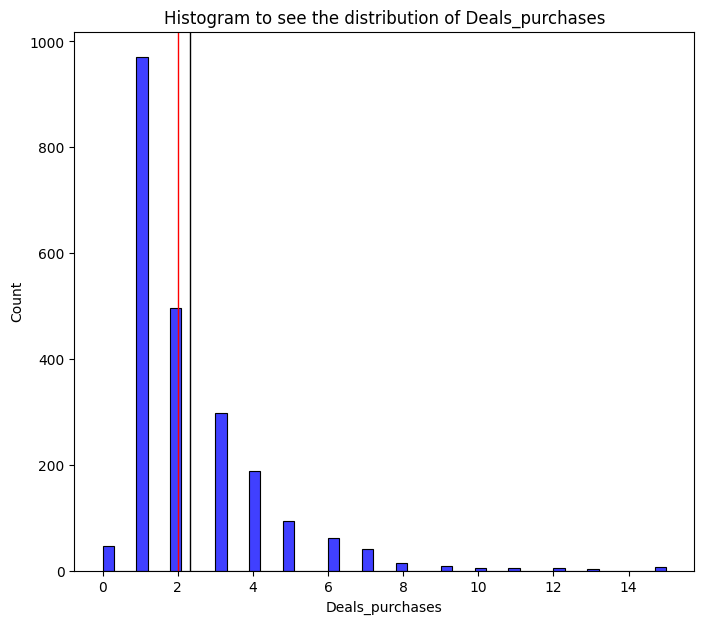

-----------------------------------------------
Mean value of Deals_purchases : 2.325
Median value of Deals_purchases : 2.0
Range of Deals_purchases : 15
Skewness of Deals_purchases : 2.4185693876889256


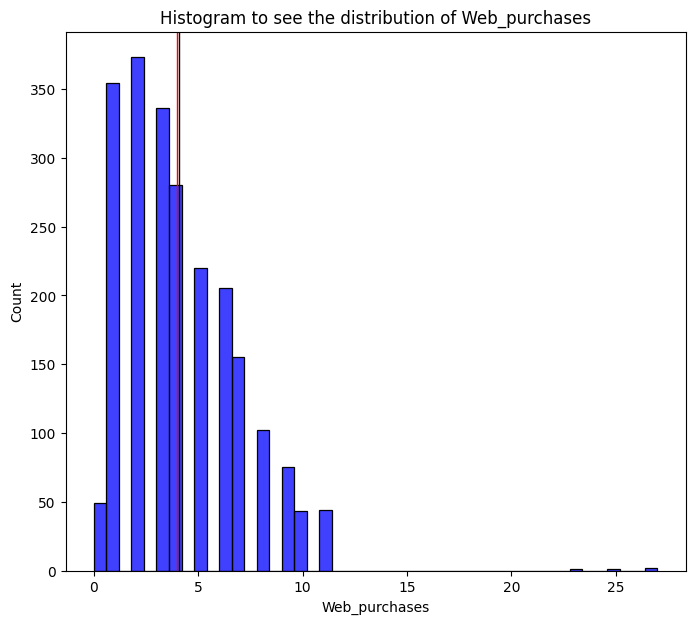

-----------------------------------------------
Mean value of Web_purchases : 4.084821428571429
Median value of Web_purchases : 4.0
Range of Web_purchases : 27
Skewness of Web_purchases : 1.382794296403589


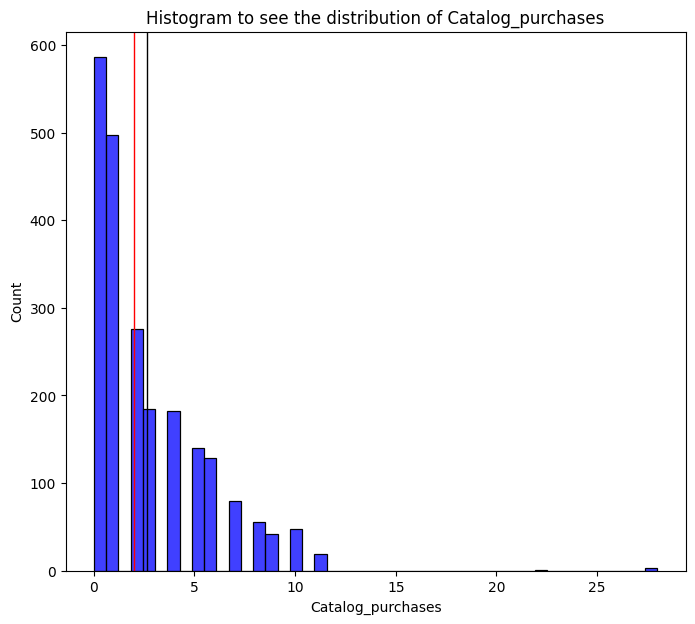

-----------------------------------------------
Mean value of Catalog_purchases : 2.6620535714285714
Median value of Catalog_purchases : 2.0
Range of Catalog_purchases : 28
Skewness of Catalog_purchases : 1.880988777771172


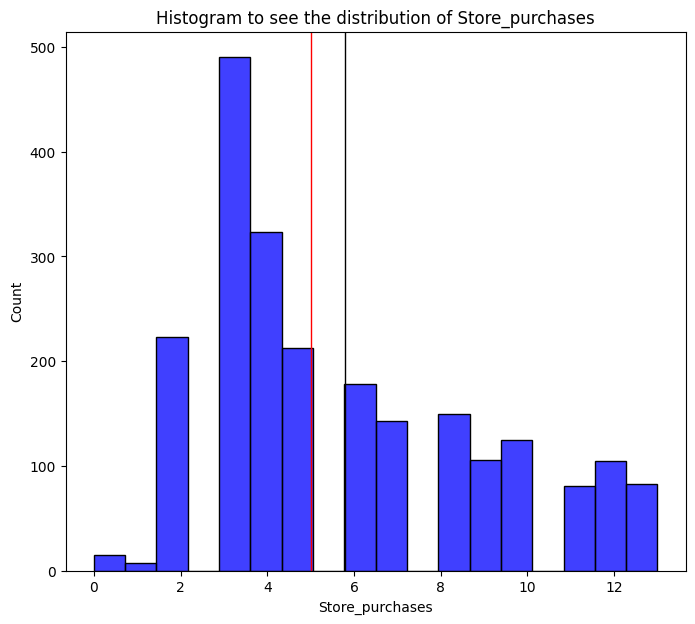

-----------------------------------------------
Mean value of Store_purchases : 5.790178571428571
Median value of Store_purchases : 5.0
Range of Store_purchases : 13
Skewness of Store_purchases : 0.7022372855251121


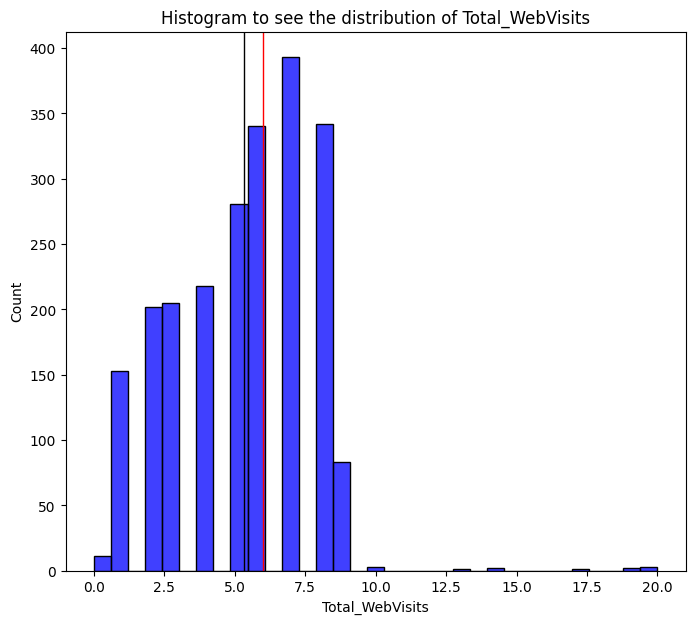

-----------------------------------------------
Mean value of Total_WebVisits : 5.316517857142857
Median value of Total_WebVisits : 6.0
Range of Total_WebVisits : 20
Skewness of Total_WebVisits : 0.20792555676611646


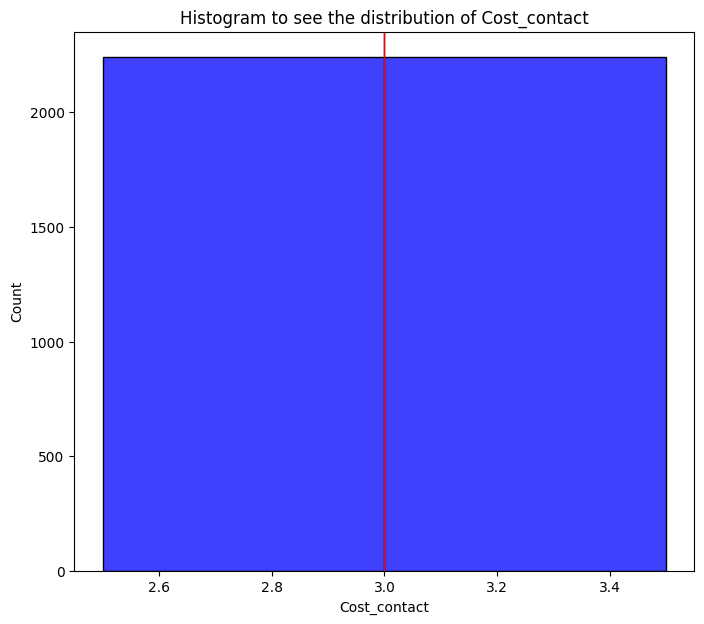

-----------------------------------------------
Mean value of Cost_contact : 3.0
Median value of Cost_contact : 3.0
Range of Cost_contact : 0
Skewness of Cost_contact : 0


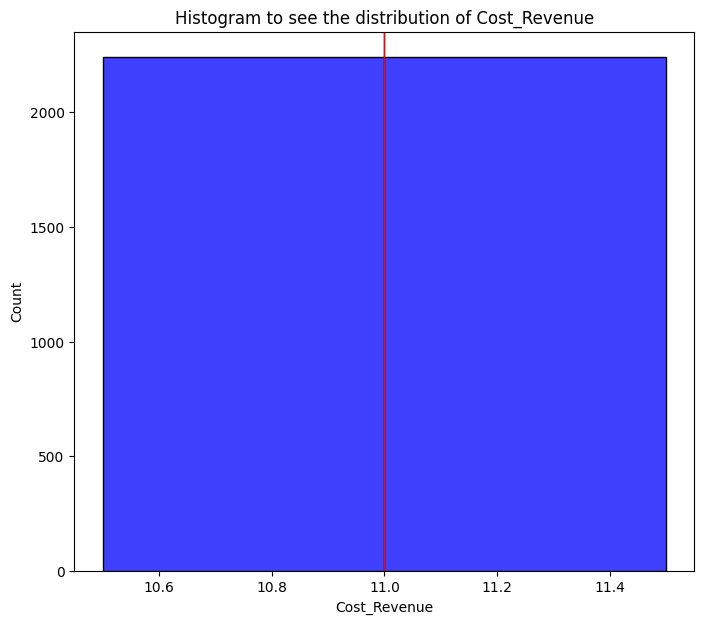

-----------------------------------------------
Mean value of Cost_Revenue : 11.0
Median value of Cost_Revenue : 11.0
Range of Cost_Revenue : 0
Skewness of Cost_Revenue : 0


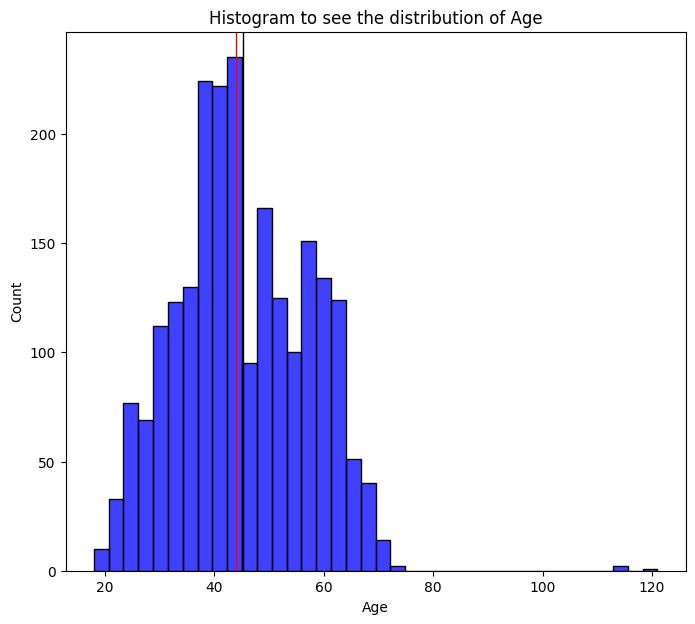

-----------------------------------------------
Mean value of Age : 45.19419642857143
Median value of Age : 44.0
Range of Age : 103
Skewness of Age : 0.34994385918267057


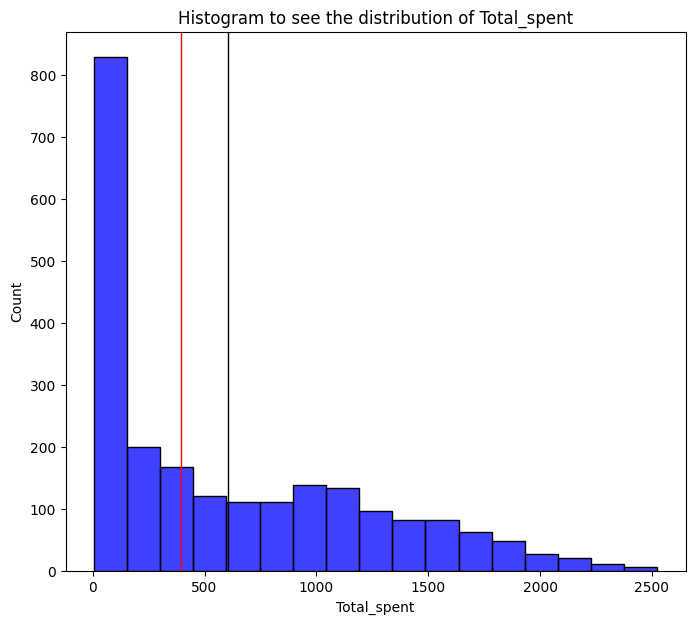

-----------------------------------------------
Mean value of Total_spent : 605.7982142857143
Median value of Total_spent : 396.0
Range of Total_spent : 2520
Skewness of Total_spent : 0.8608405071736205


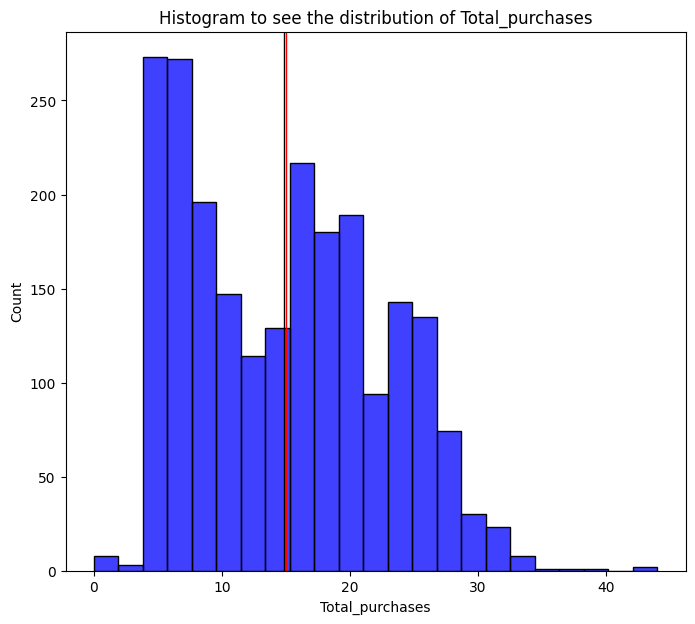

-----------------------------------------------
Mean value of Total_purchases : 14.862053571428572
Median value of Total_purchases : 15.0
Range of Total_purchases : 44
Skewness of Total_purchases : 0.25211097124738713


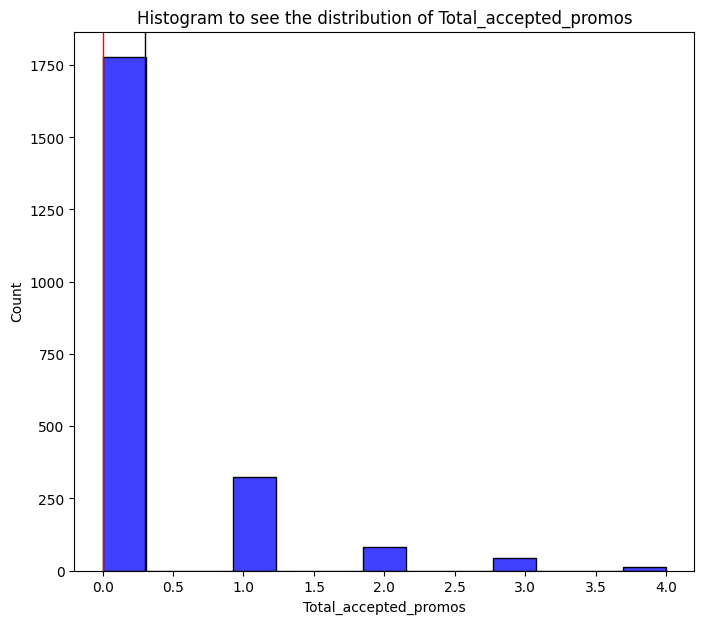

-----------------------------------------------
Mean value of Total_accepted_promos : 0.29776785714285714
Median value of Total_accepted_promos : 0.0
Range of Total_accepted_promos : 4
Skewness of Total_accepted_promos : 2.7226325118245494


In [ ]:
for i in int_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(8,7))  ## Selecting the size of each plot .
  sns.histplot(data=int_columns,x=i,color='blue')
  plt.axvline(x=int_columns[i].mean(),linewidth=1,linestyle='solid',color='black') ## Creating a line for mean .
  plt.axvline(x=int_columns[i].median(),linewidth=1,linestyle='solid',color='red') ## Creating a line for median .
  plt.title(f"Histogram to see the distribution of {i}")
  plt.show()  ## show will show all the visuals .
  print("-----------------------------------------------")
  print(f"Mean value of {i} :", int_columns[i].mean())
  print(f"Median value of {i} :", int_columns[i].median())
  print(f"Range of {i} :", int_columns[i].max()-int_columns[i].min())
  print(f"Skewness of {i} :", int_columns[i].skew())

**Details after Data Visualization :**     

All the Products_purchases columns has some skewness or positive skewness . Their Mean is higher than their Median .

'Income' column is highly skewed and it basically has few extreme outliers .'Age' column also has some extreme values . 'Total_spent' is moderately skewed .

In [ ]:
outliers_column=['Age','Income'] ## Creating a list of columns .

In [ ]:
customer.Income[customer.Income>=200000]=np.nan ## Creating null values of all those datapoints which are excedding a certain pre defined range .

<ipython-input-24-ee82f5801ef3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.Income[customer.Income>=200000]=np.nan


In [ ]:
customer.Age[customer.Age>=85]=np.nan ## Creating null values of all those datapoints which are excedding a certain pre defined range .

<ipython-input-25-26f57a842d0b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer.Age[customer.Age>=85]=np.nan


In [ ]:
int_columns=int_columns.drop(['Cost_contact','Cost_Revenue'],axis=1) ## Dropping some unnecessary columns with drop function .

Creating a for loop with boxplot for all the columns to visualize the outliers in positive and negative side .

In Normal distribution 99.7% datapoint falls between (mean-3sd) to (mean+3sd) . That's why i have printed the values of (mean+3sd) for each column .

I have also printed the minimum and maximum values for each column .

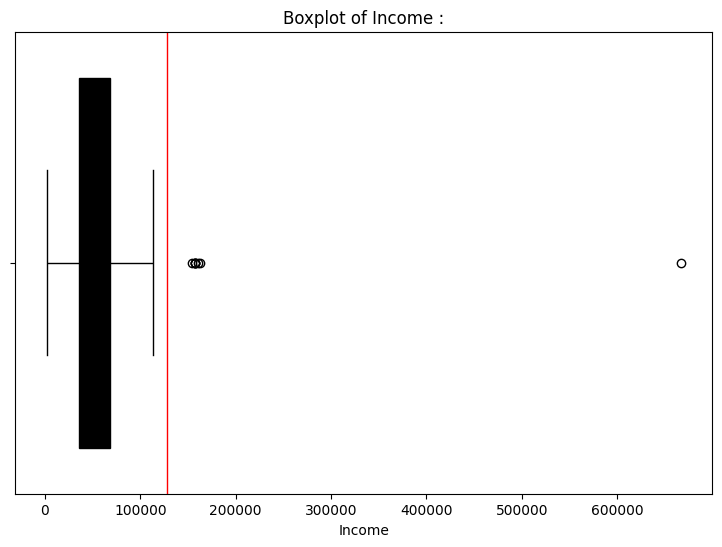

----------------------------------
Min value of Income : 1730.0
Max value of Income : 666666.0
Value of plus 3sd from mean for Income : 52249.286496089706


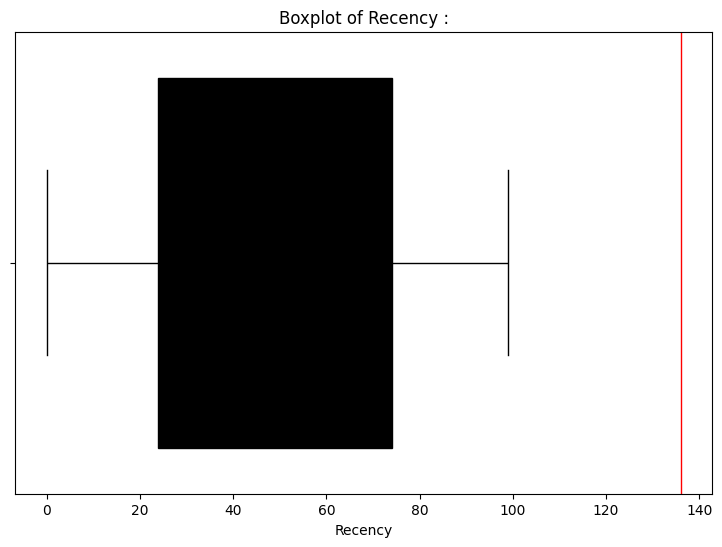

----------------------------------
Min value of Recency : 0
Max value of Recency : 99
Value of plus 3sd from mean for Recency : 51.144517299095206


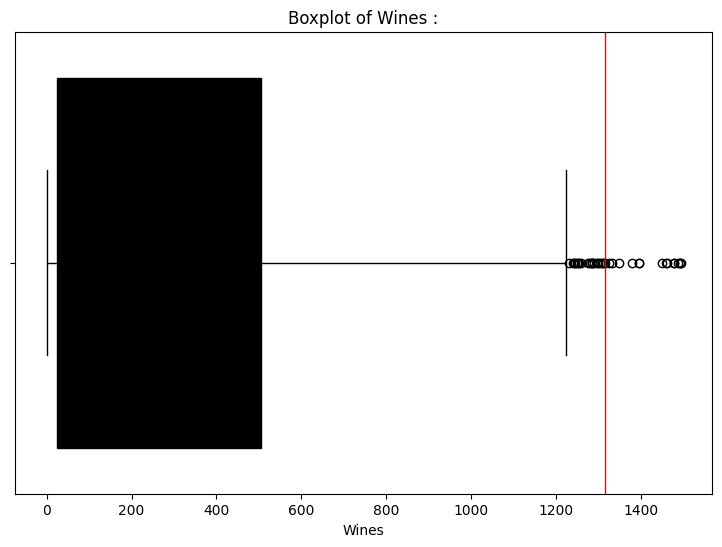

----------------------------------
Min value of Wines : 0
Max value of Wines : 1493
Value of plus 3sd from mean for Wines : 305.9708565848095


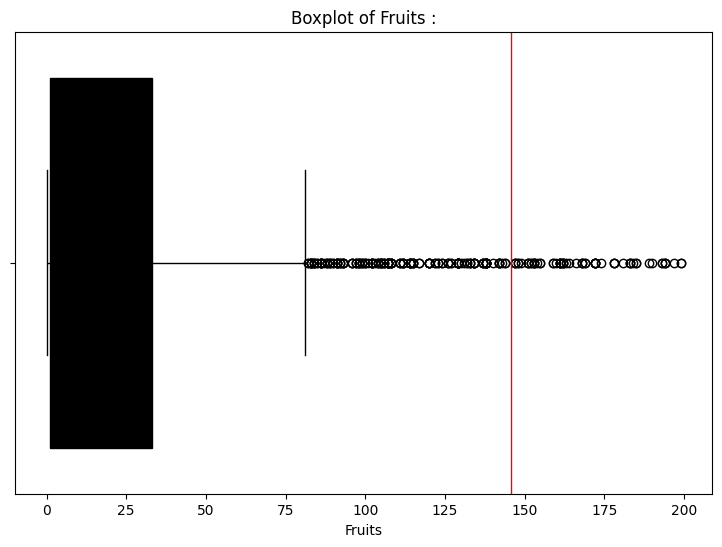

----------------------------------
Min value of Fruits : 0
Max value of Fruits : 199
Value of plus 3sd from mean for Fruits : 28.33737444195235


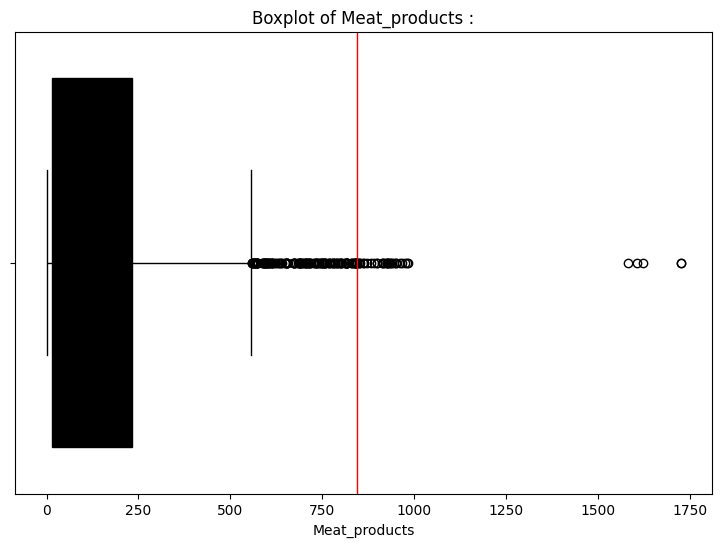

----------------------------------
Min value of Meat_products : 0
Max value of Meat_products : 1725
Value of plus 3sd from mean for Meat_products : 168.9851422990952


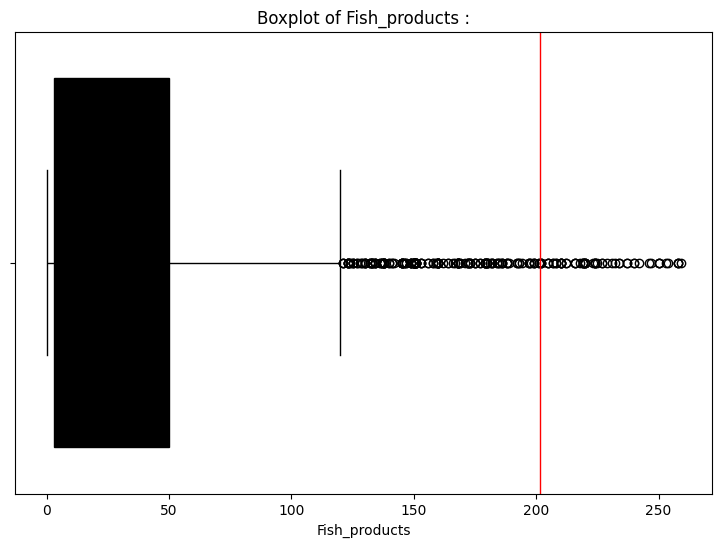

----------------------------------
Min value of Fish_products : 0
Max value of Fish_products : 259
Value of plus 3sd from mean for Fish_products : 39.560588727666634


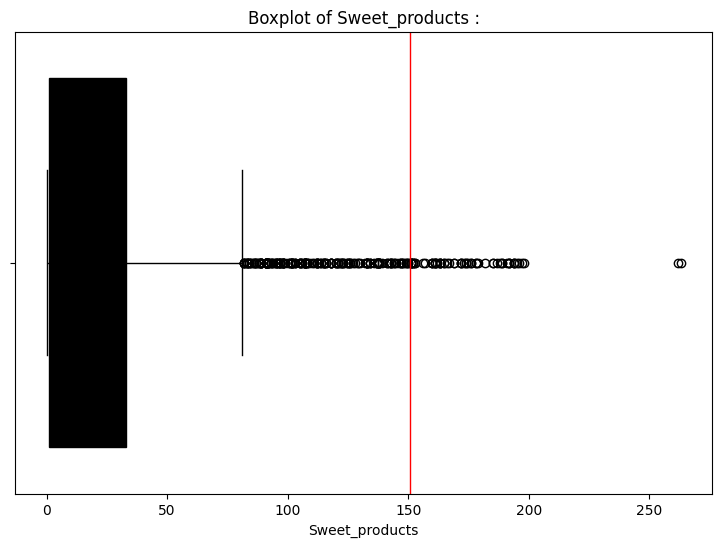

----------------------------------
Min value of Sweet_products : 0
Max value of Sweet_products : 263
Value of plus 3sd from mean for Sweet_products : 29.098088727666635


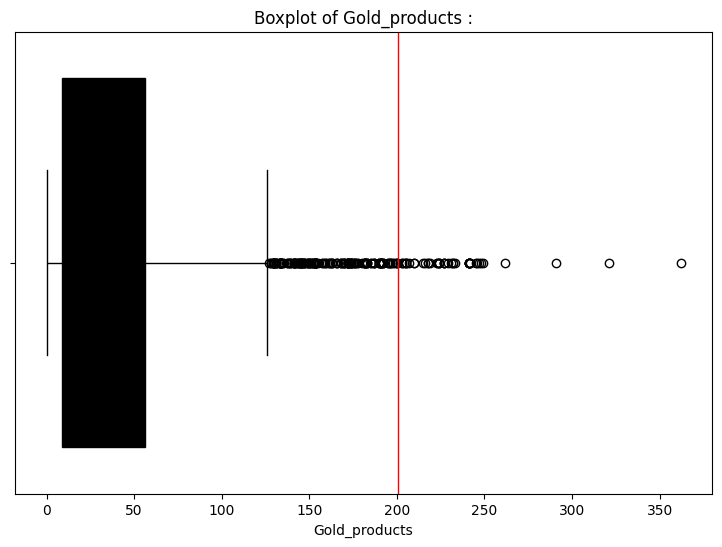

----------------------------------
Min value of Gold_products : 0
Max value of Gold_products : 362
Value of plus 3sd from mean for Gold_products : 46.05701729909521


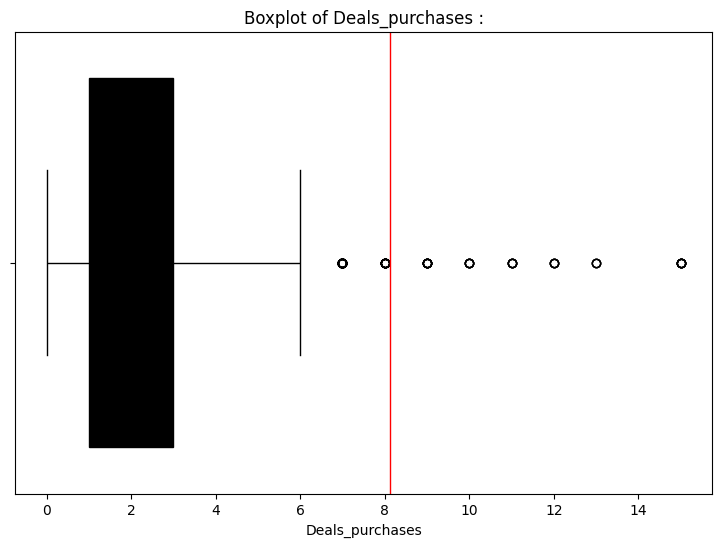

----------------------------------
Min value of Deals_purchases : 0
Max value of Deals_purchases : 15
Value of plus 3sd from mean for Deals_purchases : 4.360142299095205


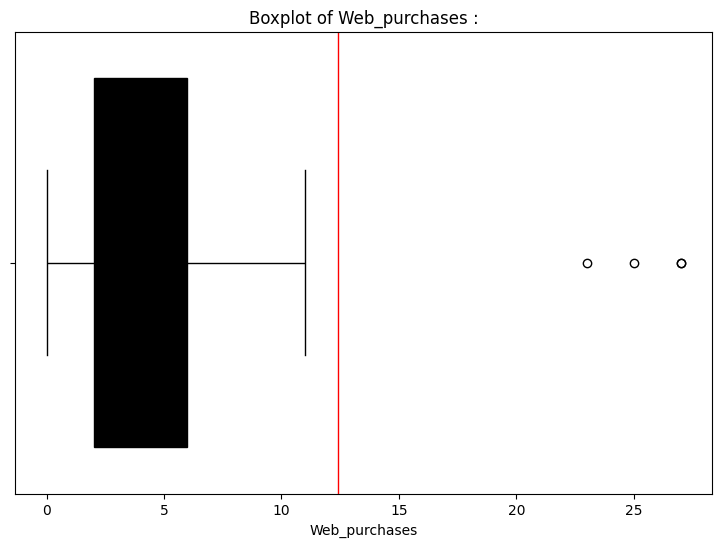

----------------------------------
Min value of Web_purchases : 0
Max value of Web_purchases : 27
Value of plus 3sd from mean for Web_purchases : 6.119963727666634


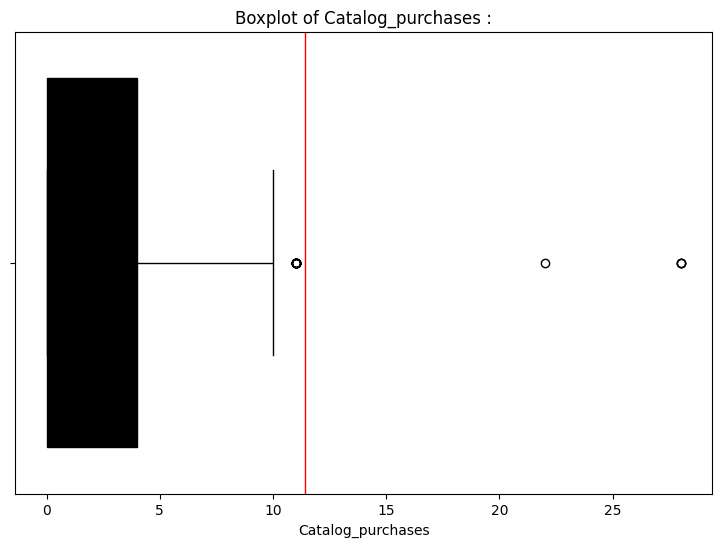

----------------------------------
Min value of Catalog_purchases : 0
Max value of Catalog_purchases : 28
Value of plus 3sd from mean for Catalog_purchases : 4.697195870523776


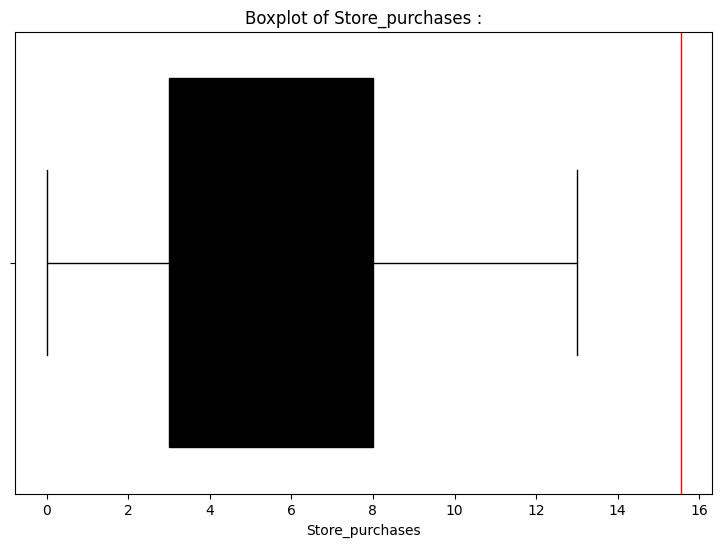

----------------------------------
Min value of Store_purchases : 0
Max value of Store_purchases : 13
Value of plus 3sd from mean for Store_purchases : 7.825320870523776


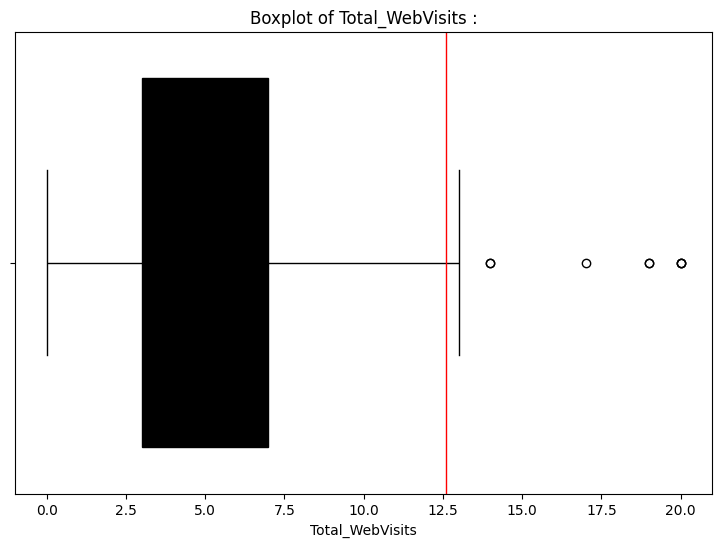

----------------------------------
Min value of Total_WebVisits : 0
Max value of Total_WebVisits : 20
Value of plus 3sd from mean for Total_WebVisits : 7.351660156238062


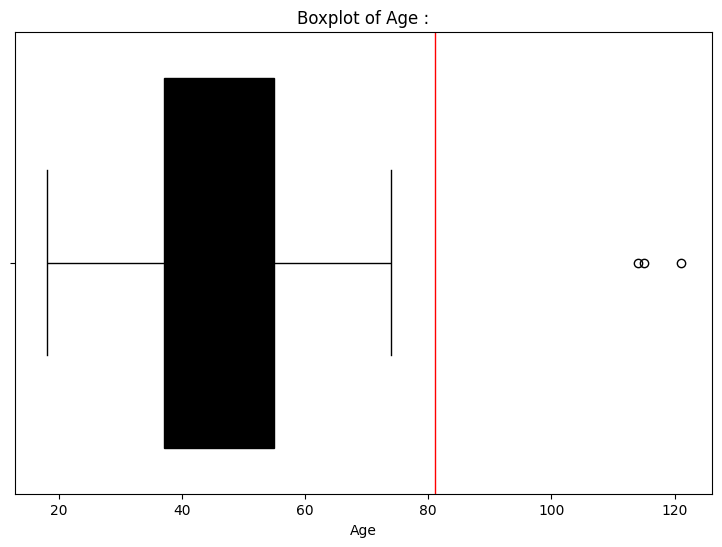

----------------------------------
Min value of Age : 18
Max value of Age : 121
Value of plus 3sd from mean for Age : 47.22933872766664


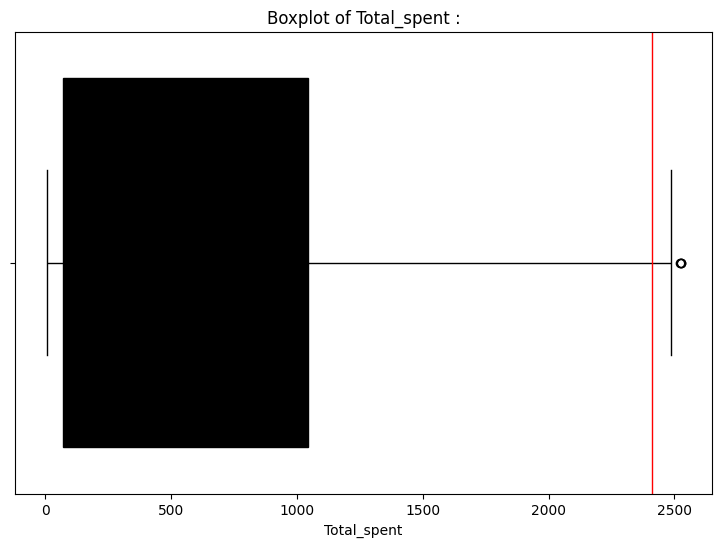

----------------------------------
Min value of Total_spent : 5
Max value of Total_spent : 2525
Value of plus 3sd from mean for Total_spent : 607.8333565848095


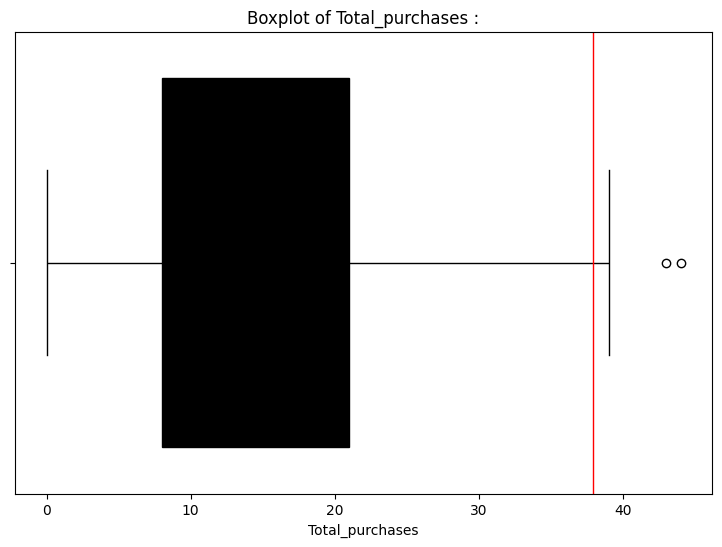

----------------------------------
Min value of Total_purchases : 0
Max value of Total_purchases : 44
Value of plus 3sd from mean for Total_purchases : 16.897195870523777


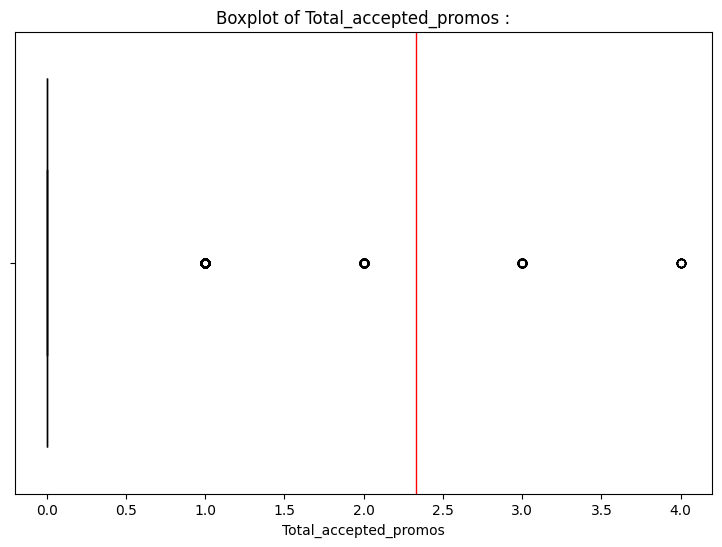

----------------------------------
Min value of Total_accepted_promos : 0
Max value of Total_accepted_promos : 4
Value of plus 3sd from mean for Total_accepted_promos : 2.332910156238062


In [ ]:
for j in int_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(9,6))  ## Selecting the size of each plot .
  sns.boxplot(data=int_columns,x=j,color='black')
  plt.axvline(x=int_columns[j].mean()+(3*int_columns[j].std()),linewidth=1,color='red',linestyle='solid')
  plt.title(f"Boxplot of {j} :")
  plt.show()  ## show will show all the visuals .
  print("----------------------------------")
  print(f"Min value of {j} :", int_columns[j].min())
  print(f"Max value of {j} :", int_columns[j].max())
  print(f"Value of plus 3sd from mean for {j} :", int_columns[j].mean()+(3*int_columns[i].std()))

**Data analysis after Boxplot :**    

Income and Age column has some outliers .
All the products column like wine , Fruits , Meat products etc has some outliers but we can not drop them because they are not extreme outliers and some customers can buy things in a big number .

In [ ]:
## Created a list for skewed columns .
skewed_columns=['Wines','Fruits','Meat_products','Fish_products','Sweet_products','Gold_products']

In [ ]:
## Dropping some unnecessary columns with drop function .
cat_columns=customer.drop(['ID','Dt_Customer','Year_Birth','Income','Recency','Wines', 'Fruits',
       'Meat_products', 'Fish_products', 'Sweet_products', 'Gold_products',
       'Deals_purchases', 'Web_purchases', 'Catalog_purchases',
       'Store_purchases', 'Total_WebVisits','Age',
       'Total_spent', 'Total_purchases', 'Total_accepted_promos'],axis=1)

Creating a for loop with countplot to see the total count of each distinct items and their percentage in each column .

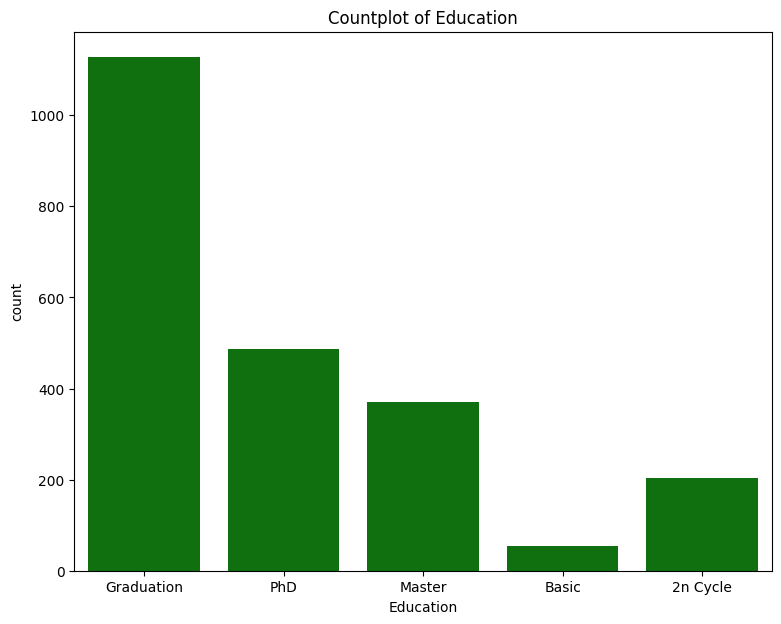

---------------------------
Percentage of each distinct items in Education :
 Education
Graduation    50.312500
PhD           21.696429
Master        16.517857
2n Cycle       9.062500
Basic          2.410714
Name: count, dtype: float64


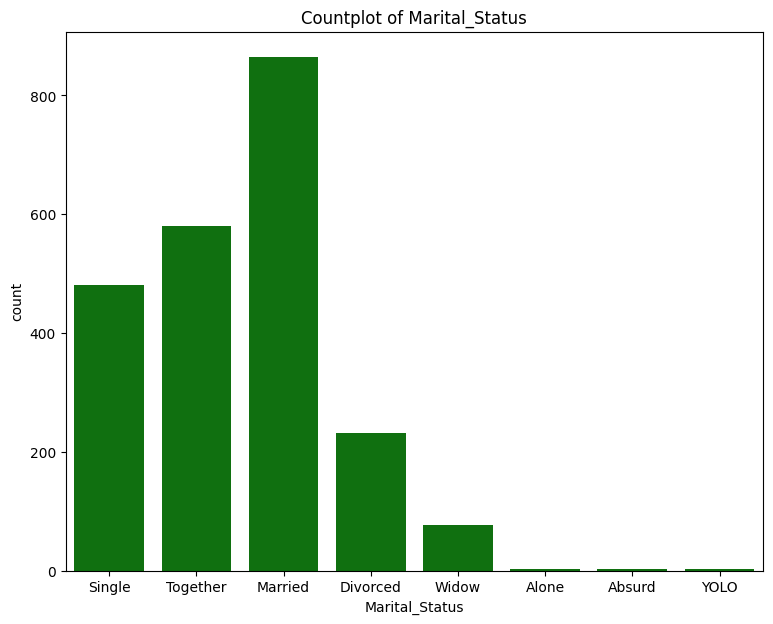

---------------------------
Percentage of each distinct items in Marital_Status :
 Marital_Status
Married     38.571429
Together    25.892857
Single      21.428571
Divorced    10.357143
Widow        3.437500
Alone        0.133929
Absurd       0.089286
YOLO         0.089286
Name: count, dtype: float64


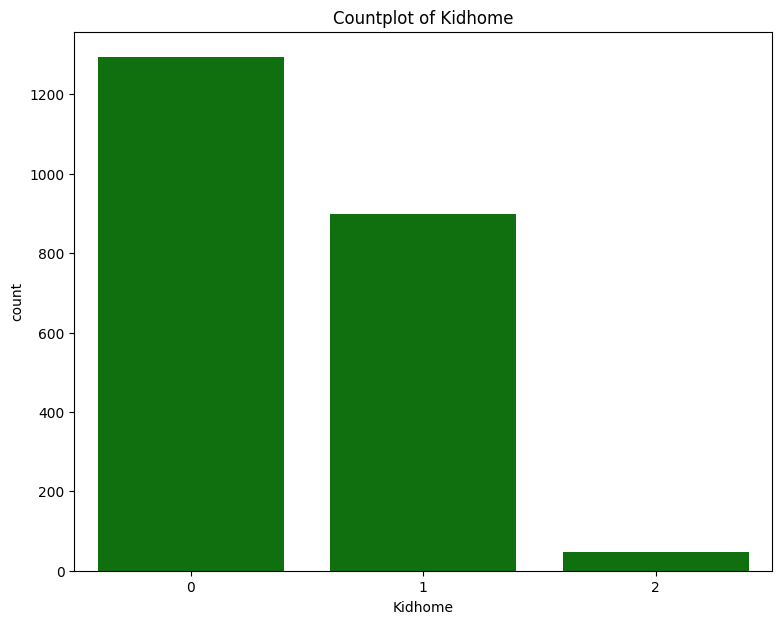

---------------------------
Percentage of each distinct items in Kidhome :
 Kidhome
0    57.723214
1    40.133929
2     2.142857
Name: count, dtype: float64


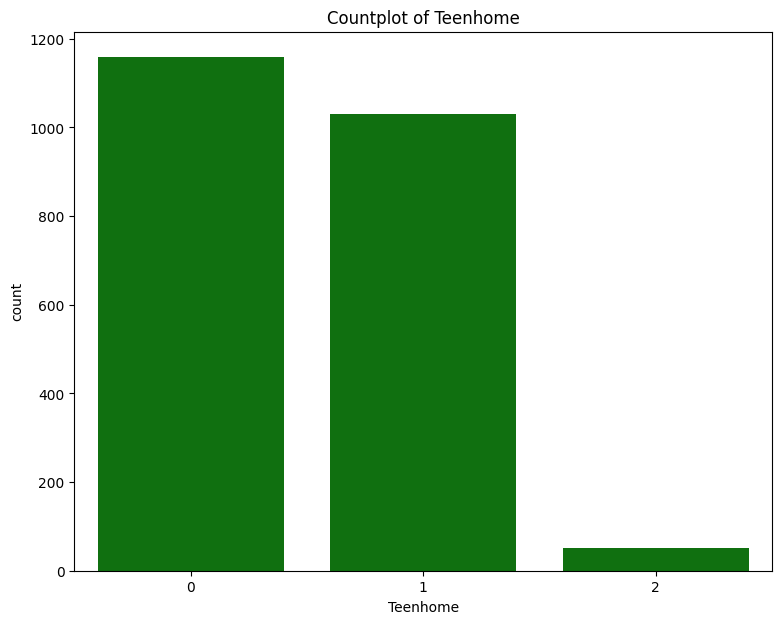

---------------------------
Percentage of each distinct items in Teenhome :
 Teenhome
0    51.696429
1    45.982143
2     2.321429
Name: count, dtype: float64


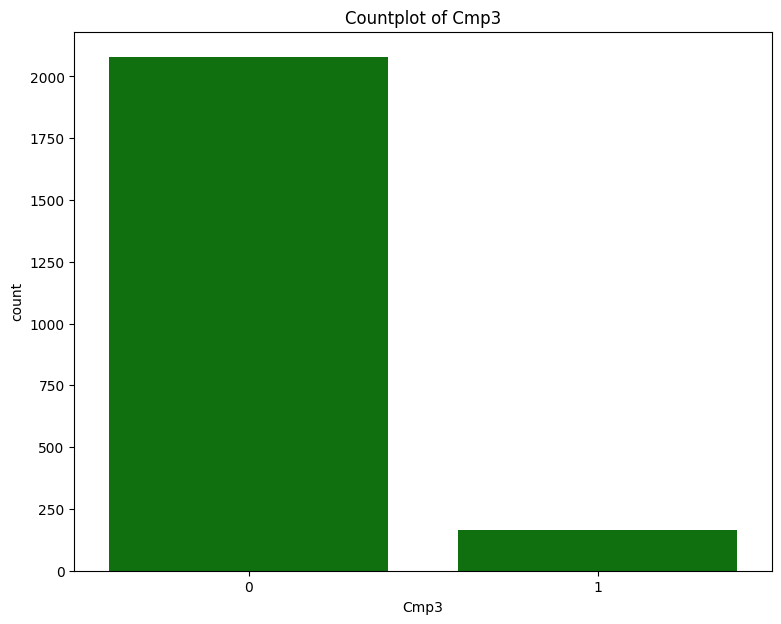

---------------------------
Percentage of each distinct items in Cmp3 :
 Cmp3
0    92.723214
1     7.276786
Name: count, dtype: float64


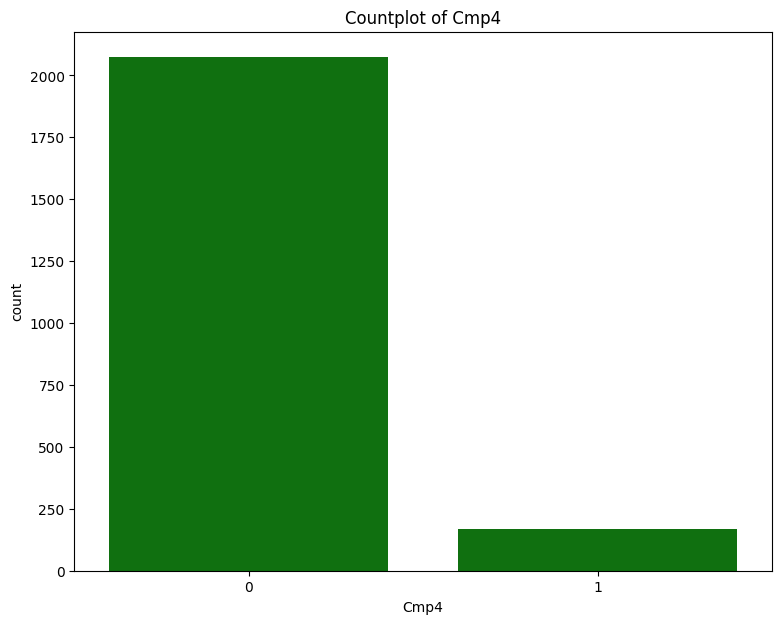

---------------------------
Percentage of each distinct items in Cmp4 :
 Cmp4
0    92.544643
1     7.455357
Name: count, dtype: float64


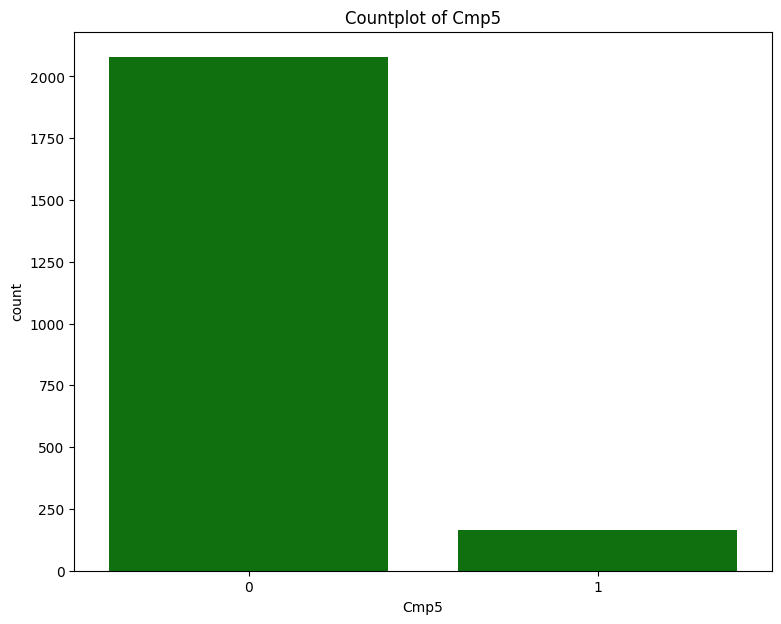

---------------------------
Percentage of each distinct items in Cmp5 :
 Cmp5
0    92.723214
1     7.276786
Name: count, dtype: float64


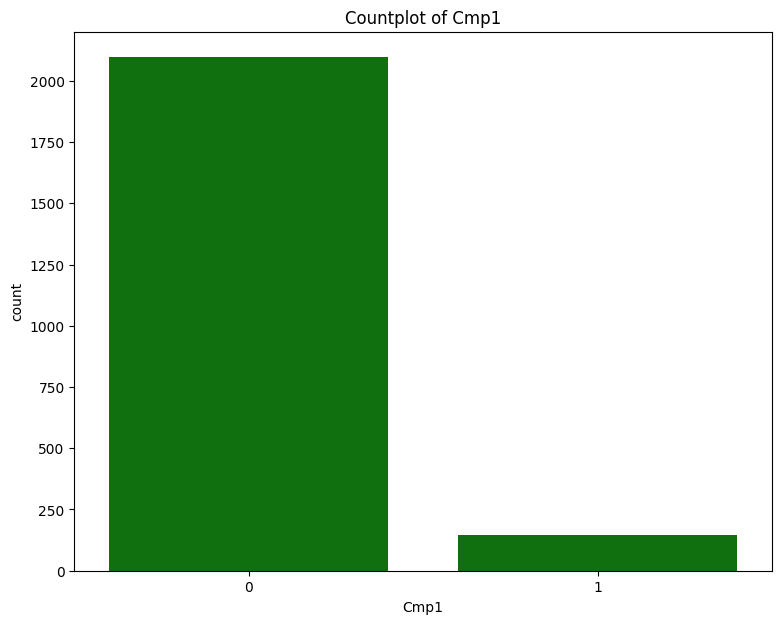

---------------------------
Percentage of each distinct items in Cmp1 :
 Cmp1
0    93.571429
1     6.428571
Name: count, dtype: float64


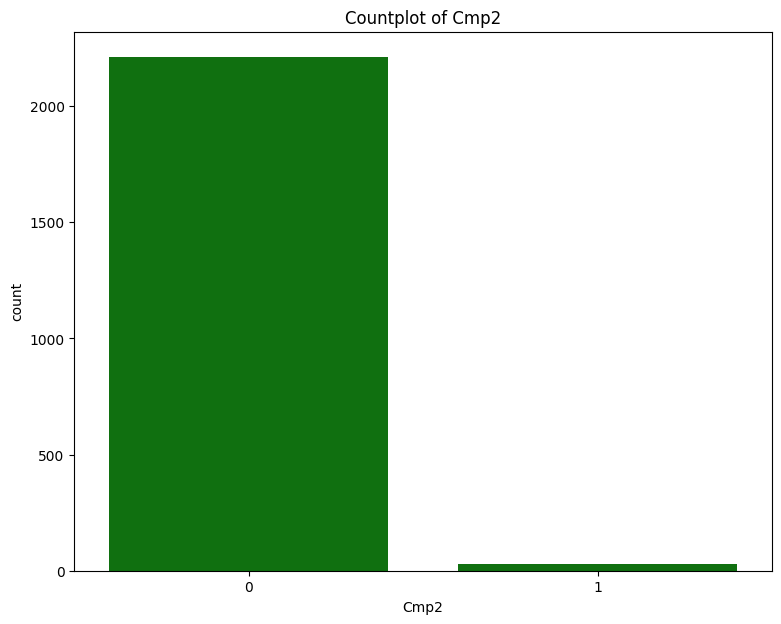

---------------------------
Percentage of each distinct items in Cmp2 :
 Cmp2
0    98.660714
1     1.339286
Name: count, dtype: float64


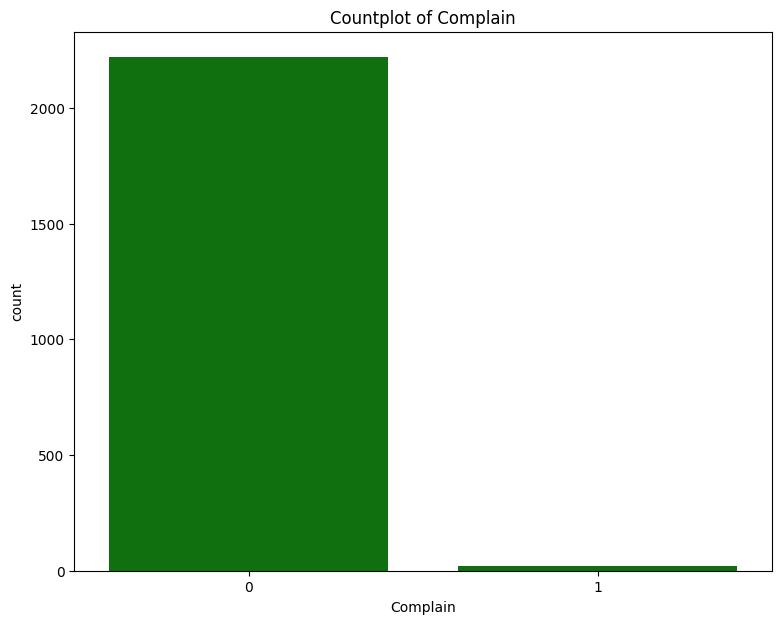

---------------------------
Percentage of each distinct items in Complain :
 Complain
0    99.0625
1     0.9375
Name: count, dtype: float64


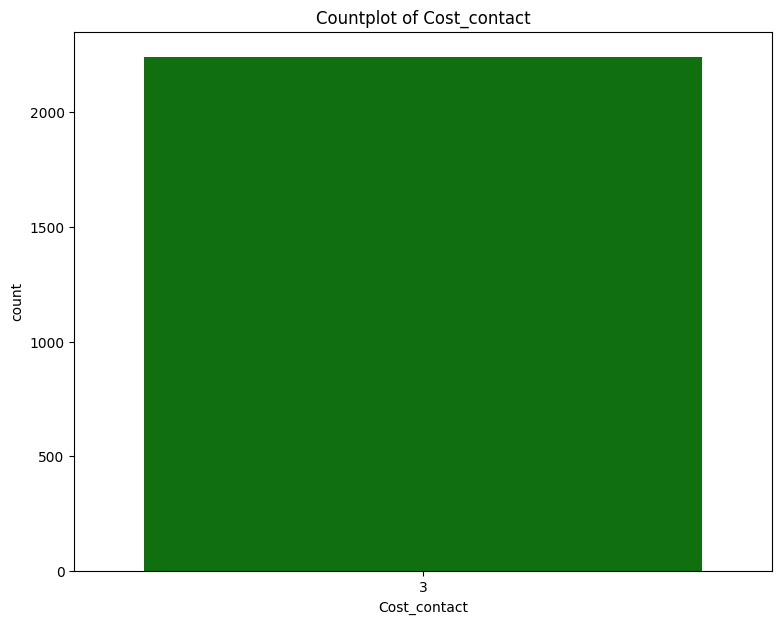

---------------------------
Percentage of each distinct items in Cost_contact :
 Cost_contact
3    100.0
Name: count, dtype: float64


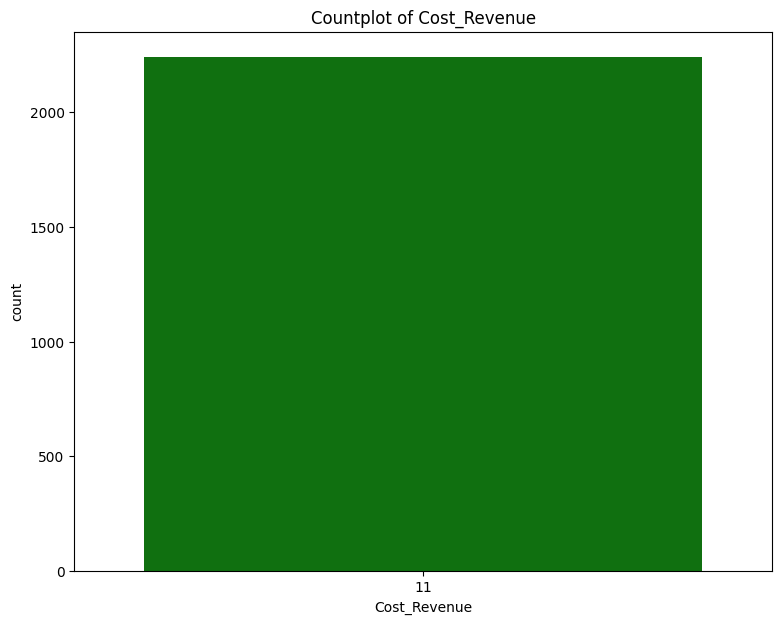

---------------------------
Percentage of each distinct items in Cost_Revenue :
 Cost_Revenue
11    100.0
Name: count, dtype: float64


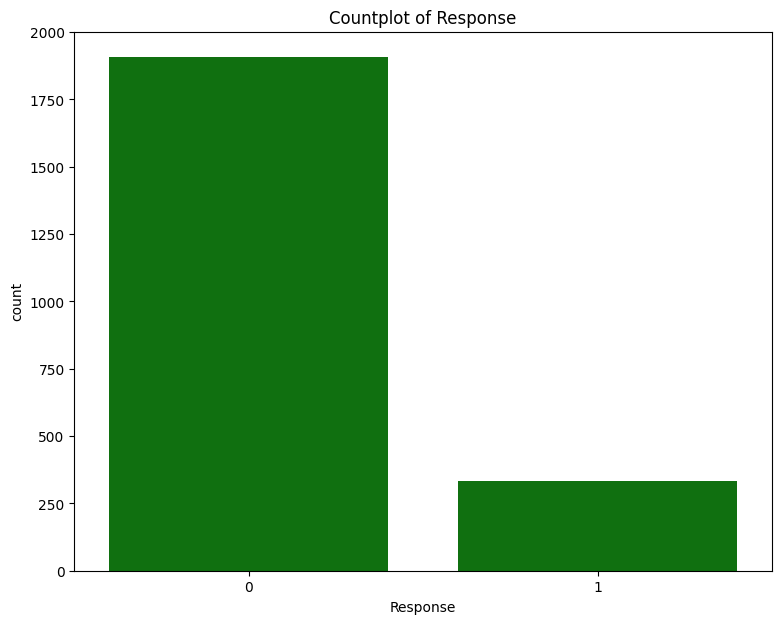

---------------------------
Percentage of each distinct items in Response :
 Response
0    85.089286
1    14.910714
Name: count, dtype: float64


In [ ]:
for i in cat_columns.columns : ## Creating the for loop .
  plt.figure(figsize=(9,7))   ## Selecting the size of each plot .
  sns.countplot(data=cat_columns,x=i,color='green')
  plt.title(f"Countplot of {i}")
  plt.show()  ## show will show all the visuals .
  print("---------------------------")
  print(f"Percentage of each distinct items in {i} :\n", (cat_columns[i].value_counts()*100)/len(cat_columns[i]))

**Analysis after data visualization :**    

1. Education : 50.31% customers are graduates . 21.69% have done PhD and only 2.4% has done basic education .

2. Almost 64% customers are either married or stay with someone . 21.42% are single and 10.35% are divorced .

3. Complain : Only 0.9% people had some complains .

4. Response : 14.91% customers had responded after campaining and promotions .

5. Kids : 57.72% customers has no kids at home , 40.13% has only 1 kid and only 2.14% has 2 kids .

6. Teen : 51.69% customers has no teen at home , 45.98% has 1 and only 2.32% has 2 kids .

In [ ]:
customer['Total_children']=customer['Kidhome']+customer['Teenhome']
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Cmp2,Complain,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,3,11,1,57.0,1617,25,0,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,3,11,0,60.0,27,6,0,2
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,3,11,0,49.0,776,21,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,3,11,0,30.0,53,8,0,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,3,11,0,33.0,422,19,0,1


In [ ]:
## Replacing some values in 'Marital_status' column to make it more useful .
customer['Lives_with']=customer['Marital_Status'].replace({'Single':'lives_alone','Together':'Two_people','Married':'Two_people','Divorced':'lives_alone',
                                                               'Widow':'lives_alone','Alone':'lives_alone','Absurd':'lives_alone','YOLO':'lives_alone'})

In [ ]:
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Lives_with
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57.0,1617,25,0,0,lives_alone
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,60.0,27,6,0,2,lives_alone
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49.0,776,21,0,0,Two_people
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,30.0,53,8,0,1,Two_people
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33.0,422,19,0,1,Two_people


In [ ]:
## Creating a column of 'Lives_with' by adding total children and adults .
customer['Lives_with']=np.where(customer['Lives_with']=='Two_people',2,1)+customer['Total_children']

In [ ]:
customer.head(10) ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Lives_with
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57.0,1617,25,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,60.0,27,6,0,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49.0,776,21,0,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,30.0,53,8,0,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33.0,422,19,0,1,3
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,0,3,11,0,47.0,716,22,0,1,3
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,0,3,11,0,43.0,590,21,0,1,2
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,0,3,11,0,29.0,169,10,0,1,3
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,0,3,11,1,40.0,46,6,0,1,3
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,0,3,11,0,64.0,49,2,1,2,4


In [ ]:
## Renaming the column to make it more understandable .
customer=customer.rename(columns={'Lives_with':'Total_family'})

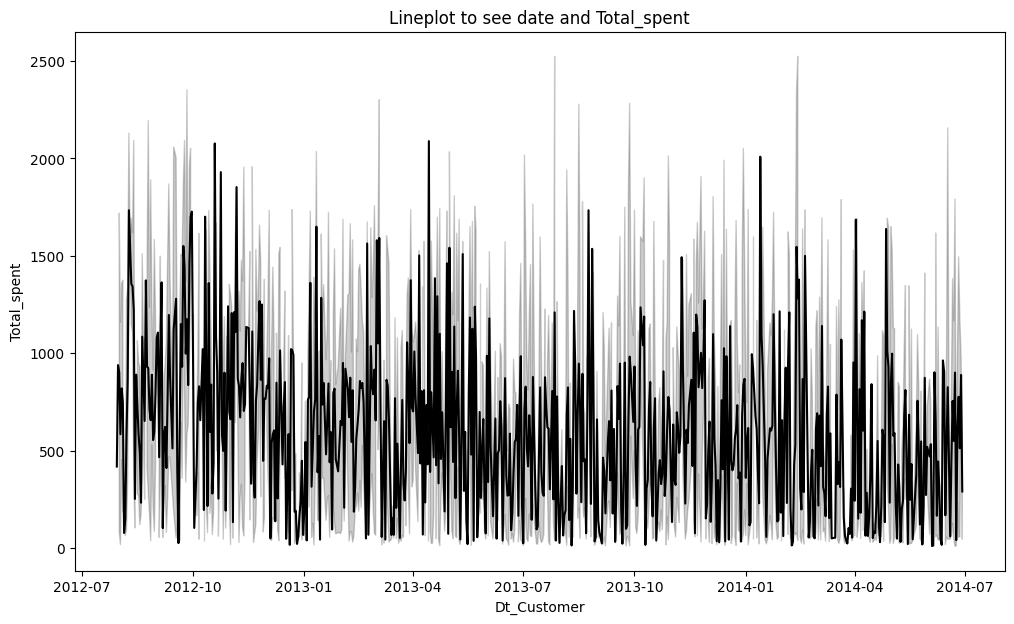

In [ ]:
## Creating a line plot between customer entry date and Total_spent .
plt.figure(figsize=(12,7))
sns.lineplot(data=customer,x='Dt_Customer',y='Total_spent',color='black')
plt.title("Lineplot to see date and Total_spent")
plt.show()

After wtching this line plot we can see that there is no such significant changes in terms of date and Total spent .

In [ ]:
## Creating a scatterplot to see if there is any positive relationship between two indipendent columns .
fig=px.scatter(customer,x='Age',y='Total_spent',width=650,
               height=650,trendline='ols',title="Scatterplot to see the relation between two columns ")
fig.show()

Age and Total_spent has a very less linera relationship .

In [ ]:
## Creating a scatterplot to see if there is any positive relationship between two indipendent columns .
fig=px.scatter(customer,x='Income',y='Total_spent',width=650,
               height=650,trendline='ols',title="Scatterplot to see the relation between two columns ")
fig.show()

Income and Total_spent has very high positive relationship with a r2 score of 62% .

In [ ]:
## Creating a scatterplot to see if there is any positive relationship between two indipendent columns .
fig=px.scatter(customer,y='Income',x='Total_family',width=650,height=650,
               trendline='ols',title="Scatterplot to see the relation between two columns ")
fig.show()

Income and Family size do not have any linear relation between each other .

In [ ]:
## Creating a scatterplot to see if there is any positive relationship between two indipendent columns .
fig=px.scatter(customer,x='Total_purchases',y='Total_spent',width=650,
               height=650,trendline='ols',title="Scatterplot to see the relation between two columns ")
fig.show()

Total_spent and Total Purchases has very high linear relationship with a r2 score of 56% .

In [ ]:
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57.0,1617,25,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,60.0,27,6,0,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49.0,776,21,0,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,30.0,53,8,0,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33.0,422,19,0,1,3


In [ ]:
## Creating a groupby of Marital_status with mean income and Total_purchases .
marital_income_total_purchase=customer[['Marital_Status','Income','Total_purchases']].groupby('Marital_Status').mean('Income','Total_purchases').sort_values('Income',ascending=False)
marital_income_total_purchase

,Income,Total_purchases
Marital_Status,,
Absurd,72365.500000,19.500000
Widow,56481.552632,16.701299
Divorced,52834.228448,15.237069
Together,52173.120629,14.817241
Married,51724.978996,14.956019
Single,50995.350318,14.243750
YOLO,48432.000000,19.000000
Alone,43789.000000,13.333333


In [ ]:
## Creating a barplot after group by to see the total count of each distinct item .
fig=px.bar(marital_income_total_purchase,y='Income',width=650,
           height=550,title='Boxplot after groupby Marital status with Income')
fig.show()

Absurd customers has the highest avg income of 72.36k followed by widows with 56.48k and ALone customers has the lowest avg income of 43.78k .

Absurd customers has the highest avg purchases and Singles has the lowest

In [ ]:
## Creating a groupby of Marital_status with median Total_spent .
marital_status_spend=customer[['Marital_Status','Total_spent']].groupby('Marital_Status').median('Total_spent').sort_values('Total_spent',ascending=False)
fig=px.bar(marital_status_spend,y='Total_spent',width=650,
           height=550,title='Boxplot after groupby Marital status with Total_spent') ## Creating a barplot after group by to see the total count of each distinct item .
fig.show()

Absurd customers spent the most in a month and alone customers spend the lowest .

In [ ]:
## Creating a groupby of Education with mean income and Total_spent .
education_income_spent=customer[['Education','Income','Total_spent']].groupby('Education').mean('Income','Total_spent').sort_values('Income',ascending=False)
education_income_spent

,Income,Total_spent
Education,,
PhD,56145.313929,672.409465
Master,52917.534247,611.781081
Graduation,52169.749776,619.898846
2n Cycle,47633.190000,496.527094
Basic,20306.259259,81.796296


In [ ]:
## Creating a barplot after group by to see the total count of each distinct item .
fig=px.bar(education_income_spent,y='Income',width=650,
           height=550,title='Boxplot after groupby Education with Income')
fig.show()

PhD holders earn the highest avg Income of 56.14k and Basic education holders earn only 20.30k on average .

In [ ]:
customer.isnull().sum() ## isnull().sum() will show us the total no of null values in each column .

ID                        0
Year_Birth                0
Education                 0
Marital_Status            0
Income                   25
Kidhome                   0
Teenhome                  0
Dt_Customer               0
Recency                   0
Wines                     0
Fruits                    0
Meat_products             0
Fish_products             0
Sweet_products            0
Gold_products             0
Deals_purchases           0
Web_purchases             0
Catalog_purchases         0
Store_purchases           0
Total_WebVisits           0
Cmp3                      0
Cmp4                      0
Cmp5                      0
Cmp1                      0
Cmp2                      0
Complain                  0
Cost_contact              0
Cost_Revenue              0
Response                  0
Age                       3
Total_spent               0
Total_purchases           0
Total_accepted_promos     0
Total_children            0
Total_family              0
dtype: int64

In [ ]:
customer=customer.dropna() ## Dropna function will drop all the null values .
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57.0,1617,25,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,60.0,27,6,0,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49.0,776,21,0,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,30.0,53,8,0,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33.0,422,19,0,1,3


In [ ]:
new_customer=customer.drop(['Marital_Status','ID','Dt_Customer','Cost_contact','Cost_Revenue'],axis=1) ## Dropping some unnecessary columns with drop function .
new_customer.head() ## head function will show us the top 5 rows .

,Year_Birth,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat_products,Fish_products,...,Cmp1,Cmp2,Complain,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family
0,1957,Graduation,58138.0,0,0,58,635,88,546,172,...,0,0,0,1,57.0,1617,25,0,0,1
1,1954,Graduation,46344.0,1,1,38,11,1,6,2,...,0,0,0,0,60.0,27,6,0,2,3
2,1965,Graduation,71613.0,0,0,26,426,49,127,111,...,0,0,0,0,49.0,776,21,0,0,2
3,1984,Graduation,26646.0,1,0,26,11,4,20,10,...,0,0,0,0,30.0,53,8,0,1,3
4,1981,PhD,58293.0,1,0,94,173,43,118,46,...,0,0,0,0,33.0,422,19,0,1,3


In [ ]:
## pd.get_dummies will convert all the categorical columns into numeric ones .
new_customer=pd.get_dummies(new_customer,columns=['Education'],dtype=int)
new_customer.head() ## head function will show us the top 5 rows .

,Year_Birth,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat_products,Fish_products,Sweet_products,...,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD
0,1957,58138.0,0,0,58,635,88,546,172,88,...,1617,25,0,0,1,0,0,1,0,0
1,1954,46344.0,1,1,38,11,1,6,2,1,...,27,6,0,2,3,0,0,1,0,0
2,1965,71613.0,0,0,26,426,49,127,111,21,...,776,21,0,0,2,0,0,1,0,0
3,1984,26646.0,1,0,26,11,4,20,10,3,...,53,8,0,1,3,0,0,1,0,0
4,1981,58293.0,1,0,94,173,43,118,46,27,...,422,19,0,1,3,0,0,0,0,1


In [ ]:
new_customer.info() ## info function will show total no of non null rows , datatypes of all the columns .

<class 'pandas.core.frame.DataFrame'>
Index: 2212 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             2212 non-null   int64  
 1   Income                 2212 non-null   float64
 2   Kidhome                2212 non-null   int64  
 3   Teenhome               2212 non-null   int64  
 4   Recency                2212 non-null   int64  
 5   Wines                  2212 non-null   int64  
 6   Fruits                 2212 non-null   int64  
 7   Meat_products          2212 non-null   int64  
 8   Fish_products          2212 non-null   int64  
 9   Sweet_products         2212 non-null   int64  
 10  Gold_products          2212 non-null   int64  
 11  Deals_purchases        2212 non-null   int64  
 12  Web_purchases          2212 non-null   int64  
 13  Catalog_purchases      2212 non-null   int64  
 14  Store_purchases        2212 non-null   int64  
 15  Total_Web

In [ ]:
from sklearn.preprocessing import StandardScaler ## Importing Standardscaler to reduce the skewness in dataset .
Sc=StandardScaler()
SC_customer=Sc.fit_transform(new_customer)  ## Fitting the model into our dataset .
SC_customer

array([[-1.01835202,  0.28710487, -0.82275354, ...,  0.99189541,
        -0.44454219, -0.52643733],
       [-1.27478522, -0.26088203,  1.04002111, ...,  0.99189541,
        -0.44454219, -0.52643733],
       [-0.33453017,  0.9131964 , -0.82275354, ...,  0.99189541,
        -0.44454219, -0.52643733],
       ...,
       [ 1.03311355,  0.23334696, -0.82275354, ...,  0.99189541,
        -0.44454219, -0.52643733],
       [-1.10382975,  0.80317156, -0.82275354, ..., -1.00817081,
         2.24950527, -0.52643733],
       [-1.27478522,  0.04229031,  1.04002111, ..., -1.00817081,
        -0.44454219,  1.89956135]])

In [ ]:
from sklearn.decomposition import PCA ## Importing PCA for dimensionality reduction .
pca=PCA(n_components=2,random_state=24,svd_solver='full') ## n_components = 2 means we want only 2 columns after dimensionality reduction .
new_pca=pca.fit_transform(SC_customer) ## Fitting the model into our dataset .
data_pca=pd.DataFrame(data=new_pca,columns=['PCA_1','PCA_2']) ## Creating a new dataframe for our PCA columns .

In [ ]:
data_pca.head() ## head function will show us the top 5 rows .

,PCA_1,PCA_2
0,4.640580,-0.139129
1,-3.007464,1.026644
2,2.060055,-0.262963
3,-2.921671,-1.884445
4,-0.538125,0.044599


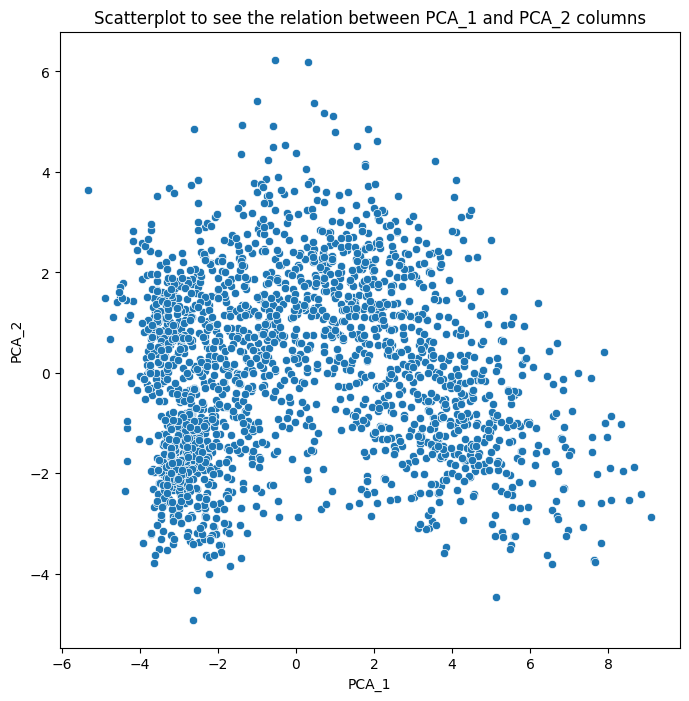

In [ ]:
## Creating a scatterplot to see if any cluster is developed between two PCA columns .
plt.figure(figsize=(8,8))
sns.scatterplot(data=data_pca,x='PCA_1',y='PCA_2')
plt.title("Scatterplot to see the relation between PCA_1 and PCA_2 columns")
plt.show()

I have plotted two PCA columns with scatterplot to see if this two make some clusters or not . Two PCA columns doesn't make any visible clusters .

In [ ]:
from sklearn.manifold import TSNE  ## Importing PCA for dimensionality reduction .
tsne=TSNE(n_components=2,n_iter=7500,random_state=9) ## n_components = 2 means we want only 2 columns after dimensionality reduction .
new_tsne=tsne.fit_transform(SC_customer) ## Fitting the model into our dataset .
tsne_data=pd.DataFrame(data=new_tsne,columns=['TSNE_1','TSNE_2']) ## Creating a new dataframe for our PCA columns .
tsne_data.head()

,TSNE_1,TSNE_2
0,27.880083,3.139253
1,-63.737335,12.827745
2,18.221657,-9.467930
3,-65.706291,-35.370014
4,-31.840343,65.598694


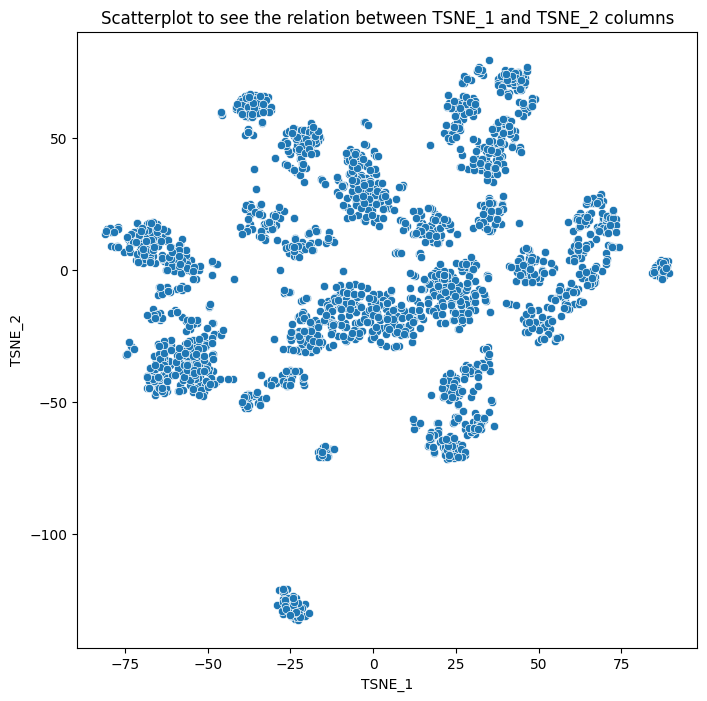

In [ ]:
## Creating a scatterplot to see if any cluster is developed between two TSNE columns .
plt.figure(figsize=(8,8))
sns.scatterplot(data=tsne_data,x='TSNE_1',y='TSNE_2')
plt.title("Scatterplot to see the relation between TSNE_1 and TSNE_2 columns")
plt.show()

I have plotted two TSNE columns with scatterplot to see if this two make some clusters or not . Two TSNE columns has make some visible clusters but the number of clusters are a little high .

In [ ]:
from sklearn.cluster import KMeans ## Importing KMeans for KMeans clustering .

WCSS is a metric which determines the right no of cluster . I have used the elbow method to see the correct number of clusters .


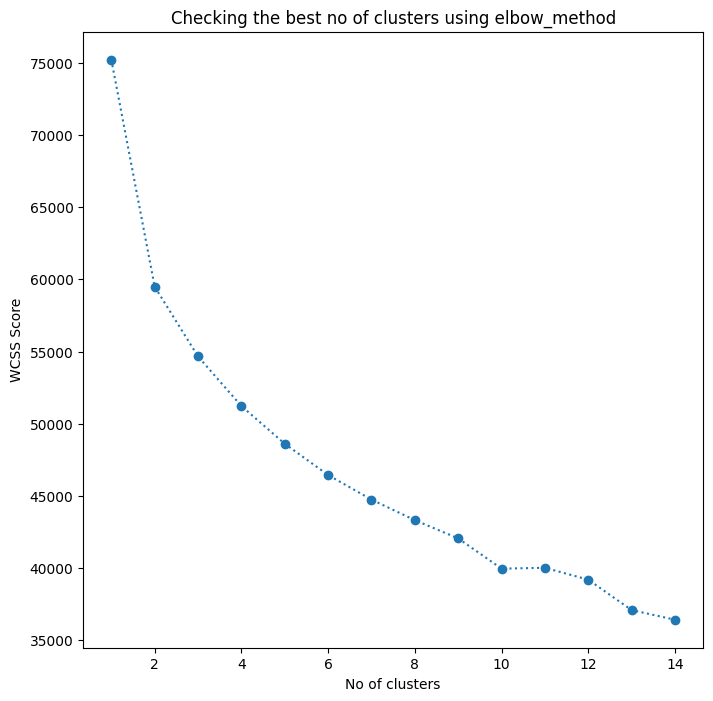

In [ ]:
WCSS=[]
for i in range(1,15) : ## Creating a for loop .
  km=KMeans(n_clusters=i,init='k-means++',n_init=10,random_state=11)
  km.fit(SC_customer) ## fitting the algorithm into our scaled data .
  WCSS.append(km.inertia_)
plt.figure(figsize=(8,8))
plt.plot(range(1,15),WCSS,marker='o',linestyle='dotted')
plt.xlabel('No of clusters')
plt.ylabel('WCSS Score')
plt.title("Checking the best no of clusters using elbow_method")
plt.show()

Here i have used the scaled data and that's why it shows 10 is the optimal number of cluster but that is not accurate for our original dataset .

In [ ]:
pip install yellowbrick ## importing yellowbrick library .

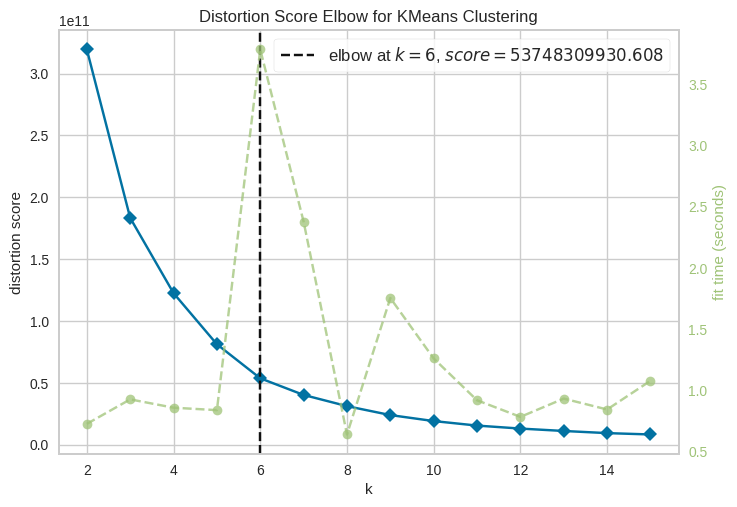

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer ## Importing KElbowVisualizer to see the best cluster .
elbow=KElbowVisualizer(KMeans(n_init=10),k=15)
elbow.fit(new_customer) ## Fitting the model into our dataset .
elbow.show()

It is clearly showing that k=6 . That means no of clusters which will be best for our dataset is 6 because it has the local minima or local lower Distortion score .

In [ ]:
New_km=KMeans(n_clusters=6,n_init=10,init="k-means++")
New_km.fit(new_customer) ## Fitting the KMeans algorithm into our dataset .

KMeans(n_clusters=6, n_init=10)

In [ ]:
customer.head() ## head function will show us the top 5 rows .

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,3,11,1,57.0,1617,25,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,3,11,0,60.0,27,6,0,2,3
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,3,11,0,49.0,776,21,0,0,2
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,3,11,0,30.0,53,8,0,1,3
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,3,11,0,33.0,422,19,0,1,3


In [ ]:
print(new_customer.shape) ## shape function will show total no of rows and columns .
print(customer.shape) ## shape function will show total no of rows and columns .

(2212, 34)
(2212, 35)


In [ ]:
customer=customer.drop(['ID'],axis=1) ## Dropping some unnecessary columns with drop function .

In [ ]:
customer['K_means_clusters']=New_km.labels_ ## Creating a new column with the labels or clusters of KMeans Clusters .

In [ ]:
customer.head() ## head function will show us the top 5 rows .

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,Cost_contact,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family,K_means_clusters
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,3,11,1,57.0,1617,25,0,0,1,5
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,3,11,0,60.0,27,6,0,2,3,5
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,3,11,0,49.0,776,21,0,0,2,0
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,3,11,0,30.0,53,8,0,1,3,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,3,11,0,33.0,422,19,0,1,3,5


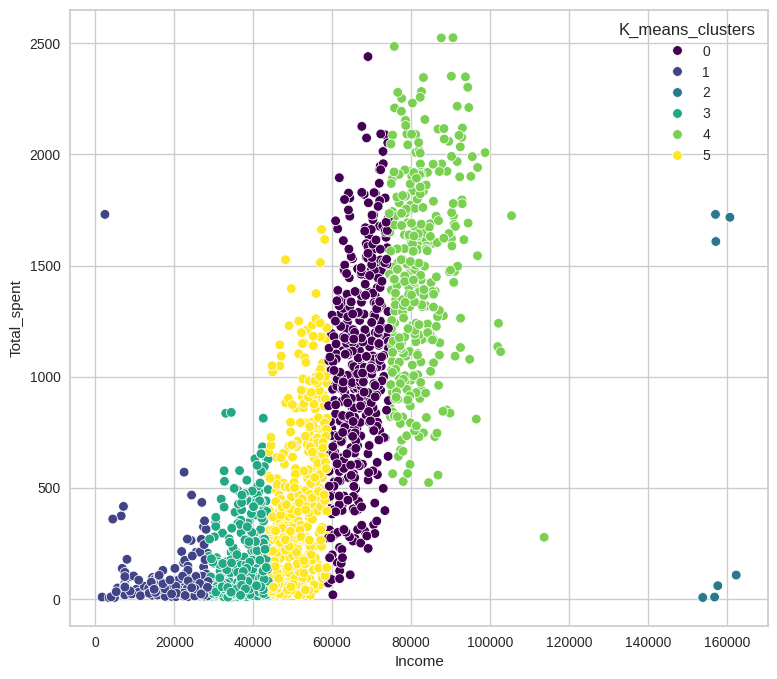

In [ ]:
## Creating a scatterplot to see if there is any cluster developed between two columns after K-means clustering .
plt.figure(figsize=(9,8))
sns.scatterplot(customer,x='Income',y='Total_spent',hue='K_means_clusters',palette='viridis')
plt.show()

Relation between Income and Total spent with different clusters after doing K-means clustering .

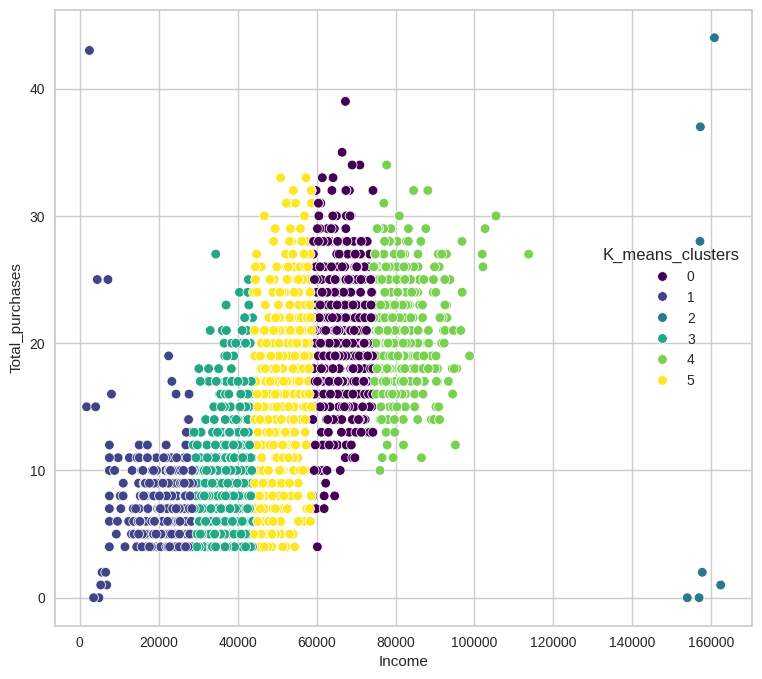

In [ ]:
## Creating a scatterplot to see if there is any cluster developed between two columns after K-means clustering .
plt.figure(figsize=(9,8))
sns.scatterplot(customer,x='Income',y='Total_purchases',hue='K_means_clusters',palette='viridis')
plt.show()

Relation between Income and Total purchases with different clusters after doing K-means clustering .

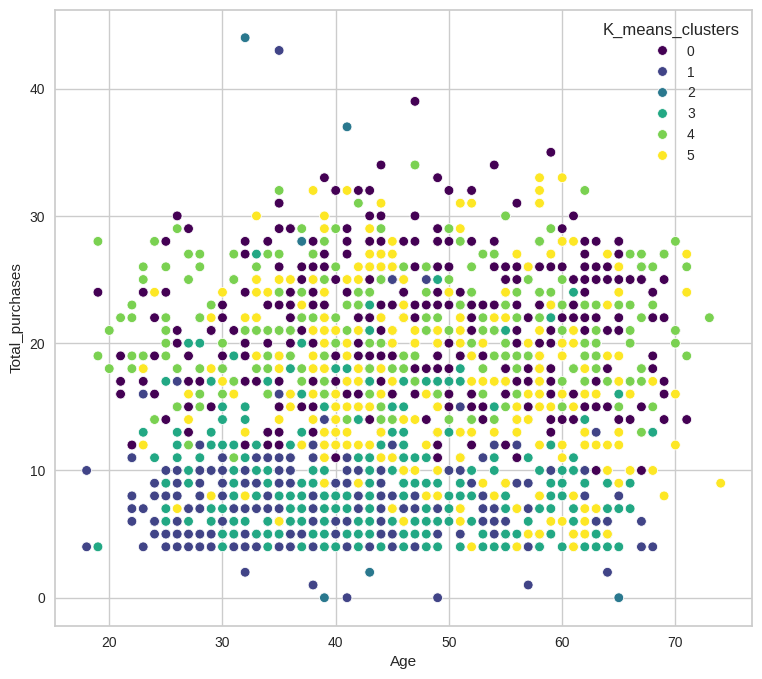

In [ ]:
## Creating a scatterplot to see if there is any cluster developed between two columns after K-means clustering .
plt.figure(figsize=(9,8))
sns.scatterplot(customer,x='Age',y='Total_purchases',hue='K_means_clusters',palette='viridis')
plt.show()

We don't see any clear pattern or relation between Age and Total Purchases in terms of different clusters .

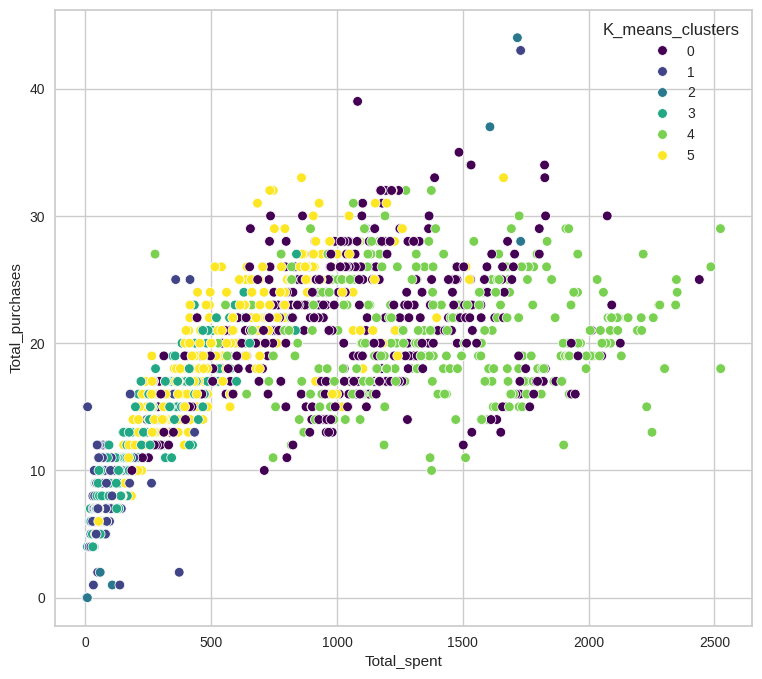

In [ ]:
## Creating a scatterplot to see if there is any cluster developed between two columns after K-means clustering .
plt.figure(figsize=(9,8))
sns.scatterplot(customer,x='Total_spent',y='Total_purchases',hue='K_means_clusters',palette='viridis')
plt.show()

We don't see any clear pattern or relation between Total spent and Total Purchases in terms of different clusters .

In [ ]:
customer.columns ## columns function will show the name of all columns .

Index(['Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits',
       'Meat_products', 'Fish_products', 'Sweet_products', 'Gold_products',
       'Deals_purchases', 'Web_purchases', 'Catalog_purchases',
       'Store_purchases', 'Total_WebVisits', 'Cmp3', 'Cmp4', 'Cmp5', 'Cmp1',
       'Cmp2', 'Complain', 'Cost_contact', 'Cost_Revenue', 'Response', 'Age',
       'Total_spent', 'Total_purchases', 'Total_accepted_promos',
       'Total_children', 'Total_family', 'K_means_clusters'],
      dtype='object')

In [ ]:
## Creating a list of essential columns .
columns=['Income', 'Recency', 'Wines', 'Fruits','Meat_products', 'Fish_products', 'Sweet_products', 'Gold_products','Age',
       'Total_spent', 'Total_purchases', 'Total_accepted_promos','Total_children', 'Total_family']

In [ ]:
## Groupby using K-Means clusters to see different insights of each cluster .
customer.groupby('K_means_clusters')[columns].mean().sort_values('Total_spent',ascending=False)

,Income,Recency,Wines,Fruits,Meat_products,Fish_products,Sweet_products,Gold_products,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family
K_means_clusters,,,,,,,,,,,,,,
4,82167.552486,49.610497,670.226519,64.875691,472.237569,93.698895,68.914365,71.812155,46.519337,1441.765193,20.980663,0.944751,0.303867,1.941989
0,66553.234469,48.919840,534.440882,45.809619,260.378758,62.767535,44.951904,68.414830,47.494990,1016.763527,20.695391,0.280561,0.751503,2.394790
2,158024.285714,52.285714,29.000000,3.142857,708.142857,3.714286,1.285714,2.571429,42.142857,747.857143,16.000000,0.000000,0.571429,2.428571
5,51410.428274,49.365904,269.399168,13.203742,80.920998,20.503119,14.534304,41.829522,48.530146,440.390852,15.933472,0.203742,1.276507,2.923077
3,36504.441459,47.700576,61.230326,6.658349,33.408829,10.220729,6.220729,20.838772,42.491363,138.577735,9.065259,0.109405,1.293666,2.932821
1,20832.663743,49.994152,12.581871,6.008772,21.359649,8.263158,6.456140,17.643275,39.225146,72.312865,7.365497,0.067251,0.932749,2.593567


In [ ]:
from sklearn.cluster import AgglomerativeClustering ## Importing Agglomerative Clustering .
agglo=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
agglo.fit(new_customer) ## Fitting the model into our dataset .

AgglomerativeClustering(metric='euclidean', n_clusters=5)

In [ ]:
customer['Agglo_clusters']=agglo.labels_ ## Creating a new column with the labels or clusters .
customer.head() ## head function will show us the top 5 rows .

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,...,Cost_Revenue,Response,Age,Total_spent,Total_purchases,Total_accepted_promos,Total_children,Total_family,K_means_clusters,Agglo_clusters
0,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,11,1,57.0,1617,25,0,0,1,5,4
1,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,11,0,60.0,27,6,0,2,3,5,4
2,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,11,0,49.0,776,21,0,0,2,0,2
3,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,11,0,30.0,53,8,0,1,3,1,1
4,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,11,0,33.0,422,19,0,1,3,5,4


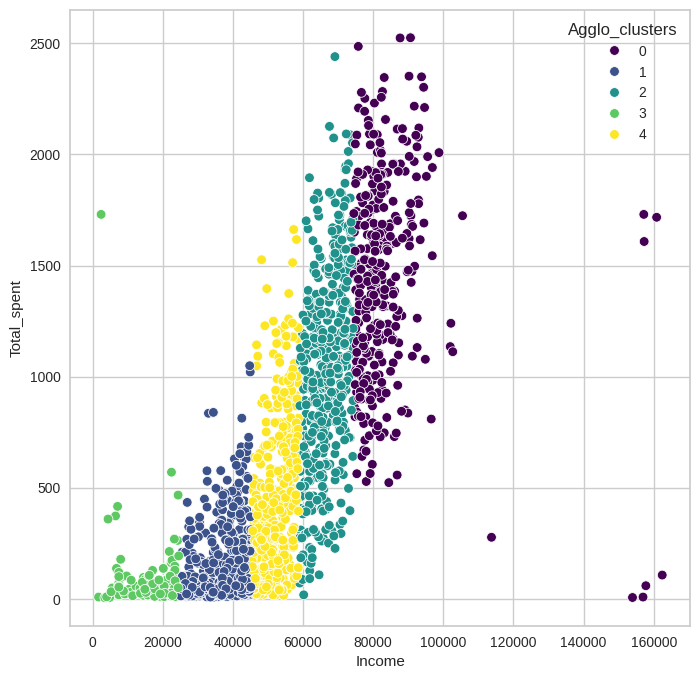

In [ ]:
## Creating a scatterplot to see if there is any cluster developed between two columns after Agglomerative clustering .
plt.figure(figsize=(8,8))
sns.scatterplot(data=customer,x='Income',y='Total_spent',palette='viridis',hue='Agglo_clusters')
plt.show()

**Income and Total_spent :**     

We can clearly see that most of the cluster 3 customers has very low income and very low spending . Cluster 1 customers mostly have lower income and lower spending . Cluster 4 customers has medium income and their spending is also in middle . Cluster 0 and cluster 2 customers mostly have high income and high spending . Some cluster 2 customers has high income but the spent very little .

There are few outliers in cluster 0 who has very high income but extremely low or zero spending .

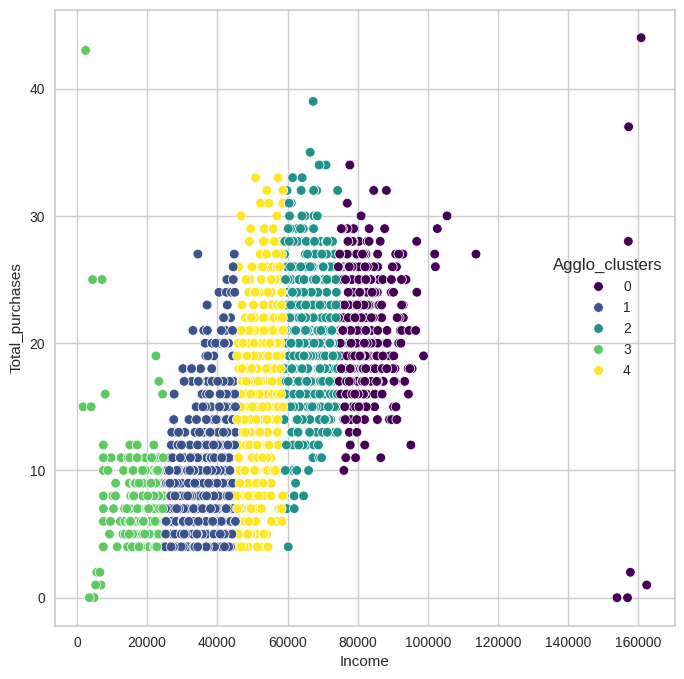

In [ ]:
## Creating a scatterplot to see if there is any cluster developed between two columns after Agglomerative clustering .
plt.figure(figsize=(8,8))
sns.scatterplot(data=customer,y='Total_purchases',x='Income',palette='viridis',hue='Agglo_clusters')
plt.show()

**Income and Total_purchases :**

We can clearly see that most of the cluster 3 customers has very low income and low Purchases . Cluster 1 customers mostly have lower income and lower purchases but few of them purchased a lot inspite of having a low income . Cluster 0 customers mostly have high income and high Purchases .

There are few outliers in cluster 0 who has very high income but extremely low or zero purchases .

In [ ]:
## Creating a list of essential columns .
columns_new=['Income', 'Recency', 'Wines', 'Fruits','Meat_products', 'Fish_products', 'Sweet_products', 'Gold_products','Age',
       'Total_spent', 'Total_purchases']

In [ ]:
## Groupby using agglomerative clusters .
customer.groupby('Agglo_clusters')[columns_new].mean().sort_values('Total_spent',ascending=False)

,Income,Recency,Wines,Fruits,Meat_products,Fish_products,Sweet_products,Gold_products,Age,Total_spent,Total_purchases
Agglo_clusters,,,,,,,,,,,
0,83606.569106,49.661247,658.062331,63.704607,476.712737,91.991870,67.631436,70.498645,46.436314,1428.601626,20.886179
2,66537.962000,48.842000,533.674000,45.732000,260.036000,62.642000,44.876000,68.334000,47.490000,1015.294000,20.686000
4,52144.986111,49.358796,281.847222,14.240741,84.483796,21.798611,15.664352,43.965278,48.826389,462.000000,16.333333
1,35672.181138,47.946108,61.655689,6.336826,32.618263,10.000000,6.188623,20.086826,42.706587,136.886228,8.997006
3,18343.345679,50.757202,11.069959,6.102881,21.641975,7.884774,6.304527,18.814815,37.983539,71.818930,7.506173


# Clusters and their key features :

**1. Cluster 0 :**    

  Cluster of 0 Customers has the highest avg income of 83606.56 and highest Total monthly spent of 1428.60 . Their avg Age is 47 years and their avg_monthly_purchases are 20.88 units. Their avg spent for wine products is 658 in a month which is highest and 63.70 for Fruits which is the lowest .

**2. Cluster 1 :**

  Cluster 1 Customers is in a lower position in terms of avg income and avg monthly spending . They have an income of 35672.18 and their avg spent is 136.88 in a month . Their avg spent for wine products is 61.65 in a month which is highest and 6.33 for Fruits and 6.18 for Sweet products which are the lowest . Their avg age is 42 and avg_monthly purchases are 9 units .

**3. Cluster 2 :**    

  Cluster of 2 Customers has the second highest avg income of 66537.96 and second highest Total monthly spent of 1015.29 . Their avg Age is 47 years and their avg_monthly_purchases are 20.68 units. Their avg spent for wine products is 533 in a month which is highest and 44.87 for sweet_products which is the lowest .

**4. Cluster 3 :**

  Cluster 3 Customers is in the lower position in terms of avg income and avg monthly spending . They have an income of 18343.34 and their avg spent is 71.81 in a month . Their highest avg spent is for meat products worth 21.64 in a month  and 6.10 for Fruits and 6.30 for Sweet products which are the lowest . Their avg age is 38 and avg_monthly purchases are 7.5 units .

**4. Cluster 4 :**

  Cluster 4 Customers is in absolute middle . Cluster of 4 has the avg income of 52144.98 and avg total_monthly spent of 1428.60 . Their avg Age is 49 years and their avg_monthly_purchases are 16.33 units. Their avg spent for wine products is 281.84 in a month which is highest and 14.24 for Fruits which is the lowest .

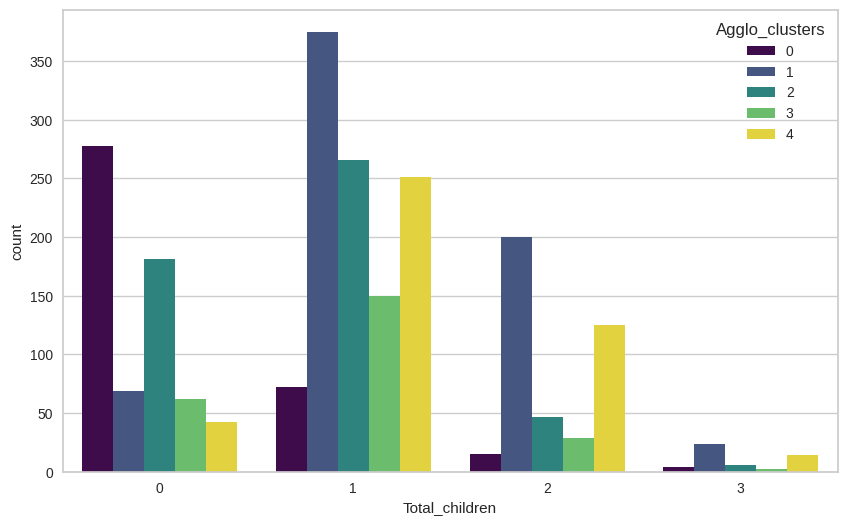

In [ ]:
## Creating a countplot to see the total count of each distinct item after running agglomerative clustering .
plt.figure(figsize=(10,6))
sns.countplot(data=customer,x='Total_children',hue='Agglo_clusters',palette='viridis')
plt.show()

**Total Children and Clusters :**

Most of the Cluster 0 customers does not have any children and few has only 1 children .

Cluster 1 customers mostly has 1 or 2 children and more than 20 customers has 3 children .

Cluster 2 customers mostly have 1 children and some customers has no children .

Cluster 3 customers mostly have 1 children but some of them has zero or some has 2 children .

Cluster 4 Customers mostly has 1 children and many has 2 children also . Very few Customers in Cluster 4 who don't have any kids and very few has 3 children also .

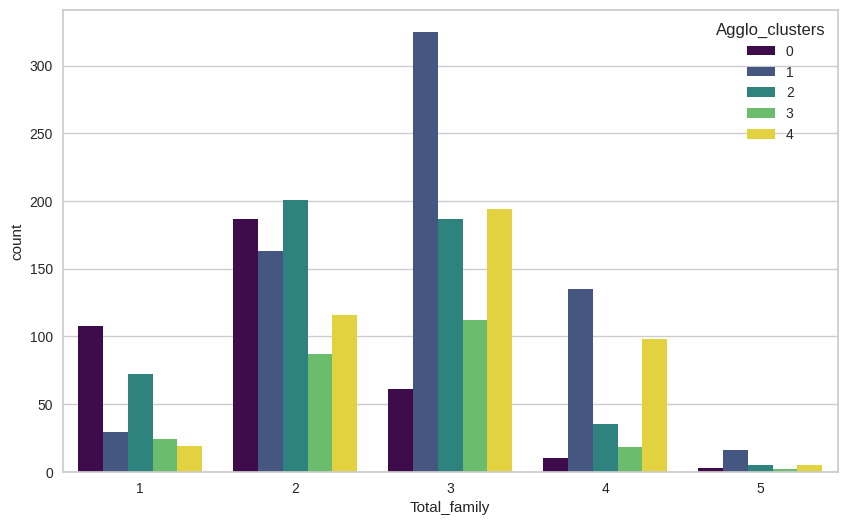

In [ ]:
## Creating a countplot to see the total count of each distinct item after running agglomerative clustering .
plt.figure(figsize=(10,6))
sns.countplot(data=customer,x='Total_family',hue='Agglo_clusters',palette='viridis')
plt.show()

**Total Family size and Clusters :**    

Cluster 0 customers are mostly single or lives with only 1 person .

Cluster 1 customers has a family of 2 and 3 people . A good amount of customers also has a family size of 4 person .  

Cluster 2 customers mostly has a family of 2 or 3 person .

Cluster 3 customers mostly has 3 or 2 family members and some of them has 4 .

Cluster 4 customers stays in a family of 3 or 4 members . some of them has 2 members also .

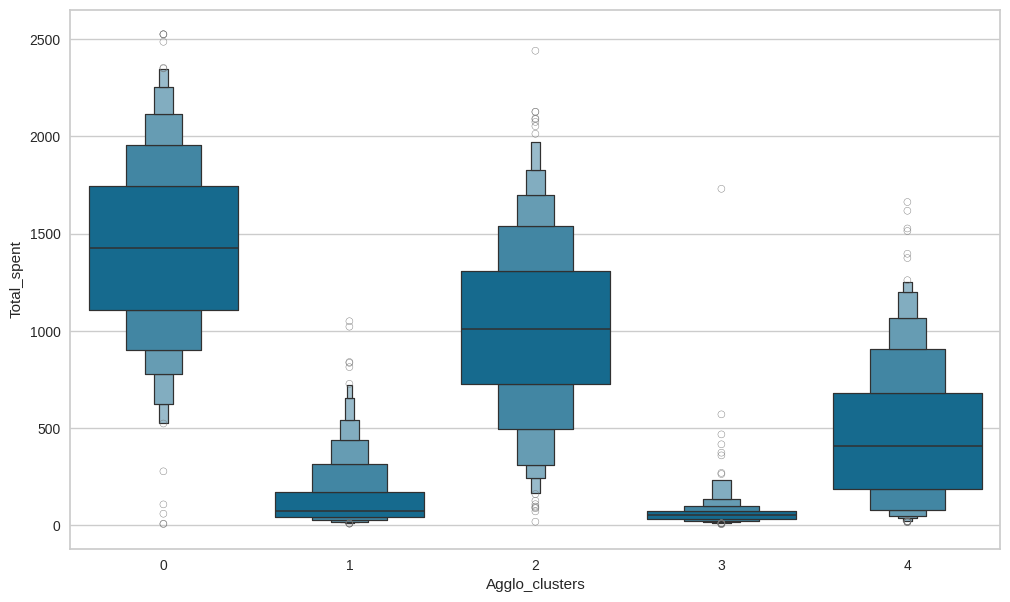

In [ ]:
## Creating a boxenplot to watch boxplot of different clustes .
plt.figure(figsize=(12,7))
sns.boxenplot(data=customer,x='Agglo_clusters',y='Total_spent')
plt.show()

**Clusters and Total_spent :**    

Cluster 0 Customers tops the highest monthly spent and in the 2nd spot we have Cluster 2 customers then in the 3rd spot we have Cluster 4 customers and in last 2 spots we have Cluster 1 and Cluster 3 with very very low_amount spending .

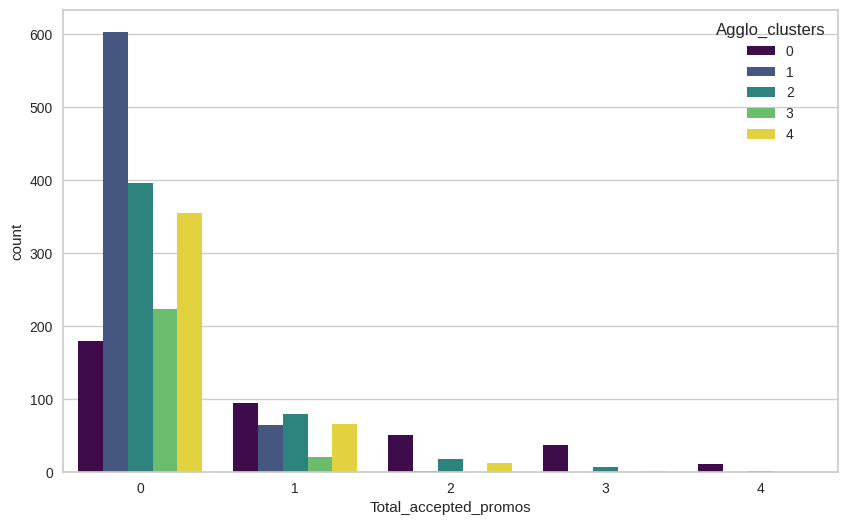

In [ ]:
## Creating a countplot to see the total count of each distinct item after running agglomerative clustering .
plt.figure(figsize=(10,6))
sns.countplot(data=customer,x='Total_accepted_promos',hue='Agglo_clusters',palette='viridis')
plt.show()

**Clusters and accepted promos :**    

Very few Cluster 0 customers accepted 3 or 4 promos in a month .
Cluster 3 is the lowest in accepting or using promos followed by Cluster 1 which is second worse .

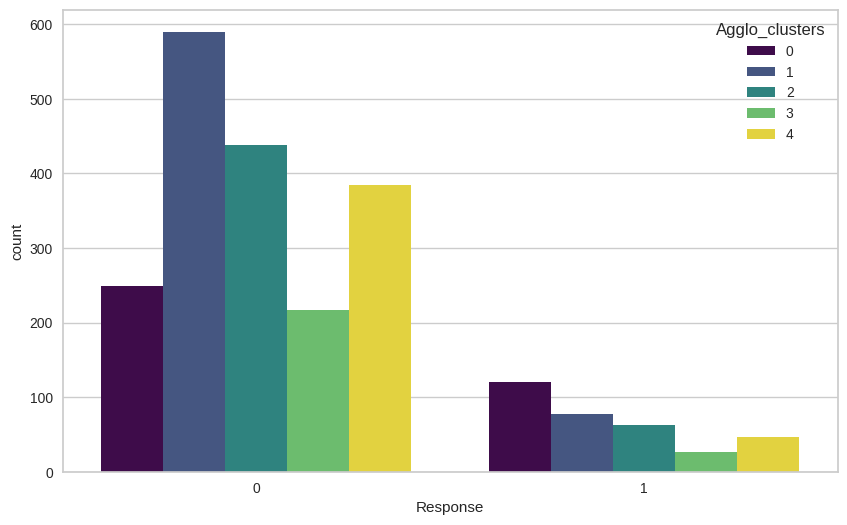

In [ ]:
## Creating a countplot to see the total count of each distinct item after running agglomerative clustering .
plt.figure(figsize=(10,6))
sns.countplot(data=customer,x='Response',hue='Agglo_clusters',palette='viridis')
plt.show()

We got the highest amount of marketing campaign response from Cluster 0 customers and lowest from Cluster 3 customers .